In [250]:
# Import Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import scale, normalize
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!pip install geopandas

import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.metrics import accuracy_score
from math import radians, cos, sin, asin, sqrt

%matplotlib inline


In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

SAMPLE ID  IGSN  SOURCE  ... H2O_M.2 H2O_P.2  INDIUM.1
0      080385-4   NaN  GEOROC  ...     NaN     NaN       NaN
1      230483-3   NaN  GEOROC  ...     NaN     NaN       NaN
2      PU-02-34   NaN  GEOROC  ...     NaN     NaN       NaN
3      PU-02-25   NaN  GEOROC  ...     NaN     NaN       NaN
4      PU-02-20   NaN  GEOROC  ...     NaN     NaN       NaN
...         ...   ...     ...  ...     ...     ...       ...
3058  DBF-03-05   NaN  GEOROC  ...     NaN     NaN       NaN
3059    DBF04-6   NaN  GEOROC  ...     NaN     NaN       NaN
3060    DBF04-5   NaN  GEOROC  ...     NaN     NaN       NaN
3061    CHO 099   NaN  GEOROC  ...     NaN     0.0       NaN
3062    LAU-2/2   NaN  GEOROC  ...     NaN     NaN       NaN

[3063 rows x 151 columns]

In [253]:
# Drop Silica
df.dropna(subset=['SIO2'])

# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

SAMPLE ID  SOURCE  ...     TH     ZR
0      080385-4  GEOROC  ...   8.60  282.0
1      230483-3  GEOROC  ...   4.30  195.0
2      PU-02-34  GEOROC  ...   8.30  307.0
3      PU-02-25  GEOROC  ...   9.18  342.0
4      PU-02-20  GEOROC  ...   8.82  308.0
...         ...     ...  ...    ...    ...
3058  DBF-03-05  GEOROC  ...    NaN    NaN
3059    DBF04-6  GEOROC  ...    NaN    NaN
3060    DBF04-5  GEOROC  ...    NaN    NaN
3061    CHO 099  GEOROC  ...   5.00  101.0
3062    LAU-2/2  GEOROC  ...  20.17  150.0

[3063 rows x 25 columns]

In [254]:
# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

# All the data
data_all = df.dropna()
# Coordinates
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
# Elemental data
X = data_all[cluster_variables]

data_all


SAMPLE ID  SOURCE  ...     TH     ZR
0     080385-4  GEOROC  ...   8.60  282.0
1     230483-3  GEOROC  ...   4.30  195.0
2     PU-02-34  GEOROC  ...   8.30  307.0
3     PU-02-25  GEOROC  ...   9.18  342.0
4     PU-02-20  GEOROC  ...   8.82  308.0
...        ...     ...  ...    ...    ...
3055    RIG187  GEOROC  ...  18.40  108.0
3056   AJO 017  GEOROC  ...   4.00   73.0
3057    AJO017  GEOROC  ...  16.30  121.0
3061   CHO 099  GEOROC  ...   5.00  101.0
3062   LAU-2/2  GEOROC  ...  20.17  150.0

[1161 rows x 25 columns]

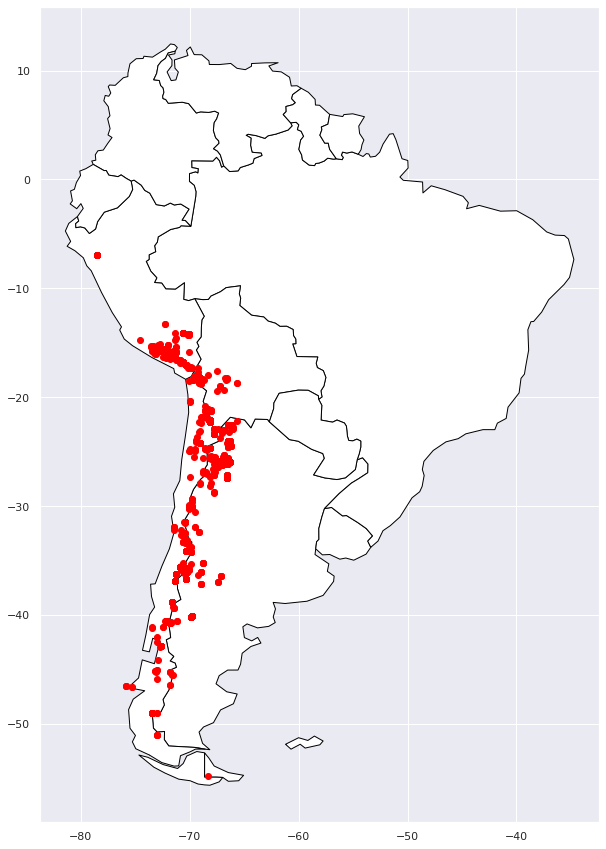

In [255]:
# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()


# Salta, Argentina Cluster
Here, we will attempt to select samples near Salta, Argentina and try and predict whether or not they are geochemically different from other samples in South America. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

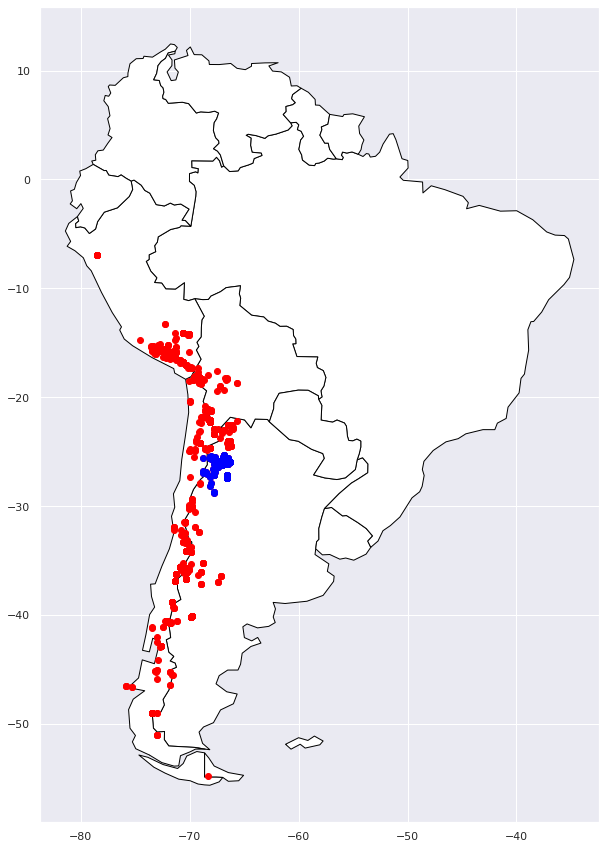

In [256]:
data_baby = df

# Defining the Ica, Peru cluster Long/Lat

Salta_Cluster = data_all.loc[(data_all['LATITUDE'] <= -25) & (data_all['LATITUDE'] >= -29) ] 
Salta_Cluster = Salta_Cluster.loc[(Salta_Cluster['LONGITUDE'] <= -65) & (Salta_Cluster['LONGITUDE'] >= -69)]



# Mark samples in cluster with 'target'
Salta_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Salta_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Salta_Cluster, geometry=geopandas.points_from_xy(Salta_Cluster['LONGITUDE'],Salta_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()


In [257]:

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
        # 'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6, 
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          }

#data_baby = df

#data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
#data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
#data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
#data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
#data_5 = data_baby[all_variables] #.loc[:,['LATITUDE', 'LONGITUDE', 'target']]

#print(data_baby)

#gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'South America'].plot(
 #   color='white', edgecolor='black',figsize = (40,25))

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')


#plt.show()



In [258]:
# Target column: 1 within the cluster; 0 not in the cluster
Salta_Cluster['target'] = 1
Salta_Cluster

SAMPLE ID  SOURCE  ...                     geometry  target
184   SAF332PB  GEOROC  ...  POINT (-67.20950 -25.97510)       1
185    SAF332A  GEOROC  ...  POINT (-67.20950 -25.97510)       1
186     CG 81A  GEOROC  ...  POINT (-67.21000 -25.98000)       1
189     SAF316  GEOROC  ...  POINT (-67.22780 -25.97730)       1
193    SAF320C  GEOROC  ...  POINT (-67.23460 -25.97590)       1
...        ...     ...  ...                          ...     ...
3028    CMS-13  GEOROC  ...  POINT (-66.58200 -26.12720)       1
3029    CG 140  GEOROC  ...  POINT (-66.81000 -25.85000)       1
3030    CG 218  GEOROC  ...  POINT (-66.81000 -25.85000)       1
3031   CG 227B  GEOROC  ...  POINT (-66.82450 -25.85360)       1
3032    CG 327  GEOROC  ...  POINT (-66.81000 -25.85000)       1

[313 rows x 27 columns]

In [259]:
# Create a Target and ID column

# Add target column to full dataset 
data_all["target"] = Salta_Cluster["target"]

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index

data_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

SAMPLE ID  SOURCE  ... target  id_number
0     080385-4  GEOROC  ...    0.0          0
1     230483-3  GEOROC  ...    0.0          1
2     PU-02-34  GEOROC  ...    0.0          2
3     PU-02-25  GEOROC  ...    0.0          3
4     PU-02-20  GEOROC  ...    0.0          4
...        ...     ...  ...    ...        ...
3055    RIG187  GEOROC  ...    0.0       3055
3056   AJO 017  GEOROC  ...    0.0       3056
3057    AJO017  GEOROC  ...    0.0       3057
3061   CHO 099  GEOROC  ...    0.0       3061
3062   LAU-2/2  GEOROC  ...    0.0       3062

[1161 rows x 28 columns]

In [260]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


___________________________________

Plot Data: Red all the samples & Blue shows the selected samples we are training/testing 

        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

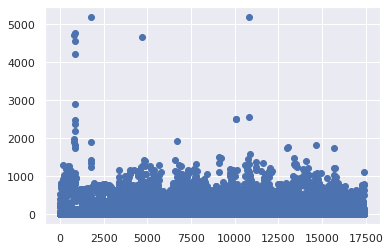

In [261]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [262]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Salta cluster = 246 samples
# 0 = other places = 915 samples 


0.0    848
1.0    313
Name: target, dtype: int64

In [263]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


In [264]:
# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

1025    0.0
1271    0.0
2089    0.0
508     0.0
2901    1.0
       ... 
1588    1.0
415     0.0
2551    0.0
3024    1.0
2949    1.0
Name: target, Length: 120, dtype: float64
  
1509    1.0
1588    1.0
1504    1.0
1579    1.0
2449    1.0
1663    1.0
1515    1.0
1706    1.0
2475    1.0
1550    1.0
222     1.0
203     1.0
1508    1.0
2901    1.0
2371    1.0
2769    1.0
2457    1.0
3021    1.0
2449    1.0
2996    1.0
2442    1.0
1504    1.0
1569    1.0
2904    1.0
1515    1.0
2429    1.0
2359    1.0
2993    1.0
231     1.0
2768    1.0
2367    1.0
2956    1.0
1508    1.0
2427    1.0
2944    1.0
2429    1.0
2775    1.0
222     1.0
1590    1.0
1708    1.0
220     1.0
2425    1.0
2993    1.0
2949    1.0
1540    1.0
3032    1.0
2976    1.0
3017    1.0
223     1.0
1512    1.0
3024    1.0
2940    1.0
208     1.0
3031    1.0
3030    1.0
2984    1.0
2369    1.0
1581    1.0
2994    1.0
2981    1.0
Name: target, dtype: float64


In [265]:
X_train

SAMPLE ID  SOURCE  ... target  id_number
1025       IP7  GEOROC  ...    0.0       1025
1271     TOCV3  GEOROC  ...    0.0       1271
2089     JAR 1  GEOROC  ...    0.0       2089
508      VQ-20  GEOROC  ...    0.0        508
2901    NB8/99  GEOROC  ...    1.0       2901
...        ...     ...  ...    ...        ...
1588   NB36/00  GEOROC  ...    1.0       1588
415   PU-03-11  GEOROC  ...    0.0        415
2551      MAC2  GEOROC  ...    0.0       2551
3024    CG 163  GEOROC  ...    1.0       3024
2949    CG 309  GEOROC  ...    1.0       2949

[120 rows x 28 columns]

## SMOTE

In [266]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (1696, 15)
After OverSampling, the shape of train_y: (1696,) 

After OverSampling, counts of label '1': 848
After OverSampling, counts of label '0': 848


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [267]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR         TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000   8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000   4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000   8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000   9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000   8.820000  308.000000
...         ...       ...        ...  ...         ...        ...         ...
1691  67.382874  0.490668  14.474764  ...  384.597824   8.881321  140.861554
1692  75.470732  0.404840  12.714809  ...  290.879615  22.148750  155.554532
1693  63.973946  0.878835  15.950184  ...  576.210055  14.771843  223.635751
1694  71.952199  0.264598  14.749110  ...   74.479991  16.894538   60.160611
1695  69.774723  0.523334  15.262083  ...  269.868652  23.311013  173.839989

[1696 rows x 15 columns]

_____________________


## Feature Scaling

In [268]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [269]:
# Standardization (Z-score Normalization) 

In [270]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()


# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
1025  0.555916 -0.312673 -0.789887  ...       1025  -24.4436     -66.21
1271  1.782646 -1.273242  0.234546  ...       1271  -24.0000     -66.33
2089 -1.492426  0.881944 -0.006497  ...       2089  -36.4300     -67.15
508  -0.030137 -0.151765  0.526435  ...        508  -35.5800     -70.85
2901 -1.418743  0.589385  1.280636  ...       2901  -27.1700     -66.58

[5 rows x 18 columns]

In [271]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
2979 -0.724623  0.572942  0.663182  ...       2979  -26.0871   -66.6877
2361 -1.355115  0.724642  1.147170  ...       2361  -26.1621   -66.4641
1579 -0.785562  0.232641  0.257046  ...       1579  -27.4000   -66.6000
1340 -1.163685  1.901345  0.476982  ...       1340  -35.2500   -68.8000
306   0.230160 -0.632461 -0.803058  ...        306  -40.5900   -72.1200

[5 rows x 18 columns]

__________________________________________________

## Scatter Matrix Plots

- Training data
- Testing data

In [272]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [273]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [274]:
# Scatter Plot Matrix - on SMOTE Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

___________________________

## PCA

1. scatter plot all of the principal components in training data
2. transformed PCA scatter
3. Variance vs. Components
4. SMOTE X_train_res

- From scatter plots, we see that it is dificult to cluster our target samples from the other samples. While there are regions where our target samples are located it isn't well seperated

- Transformed PCA doesn't seem to do much.

- There are around 2.5 number of components that explain the variance in the X_training data

In [275]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

I don't see much class separation. There are regions where the Salta cluster can be but its difficult to distinguish from the other samples. 

In [276]:
# PCA - training data

pca = PCA(n_components=3)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.36713928 -0.33379717 -0.25870853 -0.32820959 -0.20657567 -0.31286561
  -0.33173039 -0.0870643   0.26381569 -0.28364882 -0.07482879  0.20366934
  -0.27635312  0.1388692  -0.1678133 ]
 [ 0.13613289 -0.16493308 -0.21310381 -0.02304755  0.22184535 -0.19913391
  -0.08299512  0.42402482 -0.27009693 -0.26462107  0.36477319 -0.38564696
  -0.04876176 -0.42267389  0.16424047]
 [ 0.03099229  0.21338375 -0.26882956  0.23429709  0.32231589 -0.20660396
  -0.05670662  0.08337607 -0.05430484  0.13800967 -0.32815859  0.13589185
  -0.43345806  0.21081468  0.53770197]]
 
original shape:    (120, 18)
transformed shape: (120, 3)


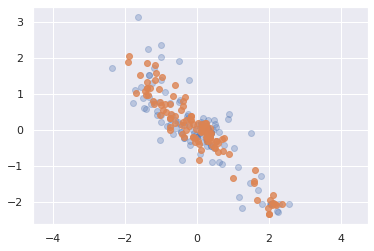

In [277]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

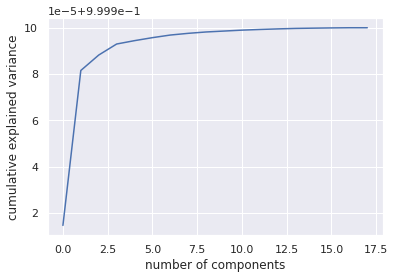

In [278]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [279]:
# Visualize all PCA components - SMOTE Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA(n_components=4)
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [280]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.39854659  0.35726752  0.31897529  0.34109815  0.09231956  0.34797503
   0.37013106  0.1008255  -0.22121089  0.2935169   0.03137529 -0.1376958
   0.22717562 -0.08813872  0.06516801]
 [ 0.09221095 -0.15401558 -0.08237861 -0.00616631  0.09996871 -0.15127143
  -0.05016548  0.45868017 -0.39513328 -0.30449611  0.15084677 -0.43489209
   0.10893652 -0.48442585  0.08889086]
 [ 0.02060399 -0.00765124  0.03000437 -0.08212272 -0.07489044 -0.07766417
  -0.06115191  0.01454364  0.10330354  0.02912333  0.6147034   0.31568361
   0.38648388  0.03007069  0.58049197]
 [-0.01813421 -0.20002753  0.04613707 -0.0246038   0.25092394  0.13516558
   0.04441503 -0.52258928  0.36588831 -0.03953516  0.24787518 -0.21080865
   0.26780505 -0.44032879 -0.30609262]]
 
original shape:    (1696, 15)
transformed shape: (1696, 4)


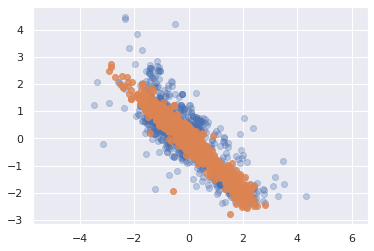

In [281]:
X_new_res = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new_res[:, 0], X_new_res[:, 1], alpha=0.8)
plt.axis('equal');

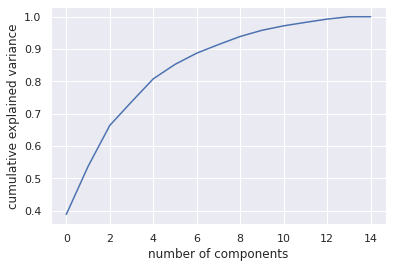

In [282]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

__________________________________________

## RandomForestClassifier

- X_train
- Second time X_train
- X_test
- Long on y_train
- Lat on y_train

Feature Importance: 
1. Variable: RB                   Importance: 0.19
2. Variable: NA2O                 Importance: 0.17
3. Variable: TH                   Importance: 0.15
4. Variable: K2O                  Importance: 0.07
  
- Consistantly, RB, NA2O, TH, and K2O are the top four most important features. Although for each training set, they might be at a different level of importance. They still remain the top 4 important variables 

- Randomforest on Latitude is more accurate than Longitude


In [283]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.825]
 
[[54  6]
 [15 45]]


Here, we see that we get an accurracy score of ~80- 91%

In [284]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: NA2O                 Importance: 0.23
Variable: TH                   Importance: 0.16
Variable: RB                   Importance: 0.11
Variable: K2O                  Importance: 0.1
Variable: MNO                  Importance: 0.08
Variable: SR                   Importance: 0.05
Variable: ZR                   Importance: 0.05
Variable: BA                   Importance: 0.04
Variable: SIO2                 Importance: 0.03
Variable: FEOT                 Importance: 0.03
Variable: MGO                  Importance: 0.03
Variable: TIO2                 Importance: 0.02
Variable: CAO                  Importance: 0.02
Variable: P2O5                 Importance: 0.02
Variable: AL2O3                Importance: 0.01


In [285]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['RB','NA2O','TH','K2O']], y_train)
pred = rf.predict(X_train[['RB','NA2O','TH','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.5583333333333333]
 
[[31 29]
 [24 36]]


Using the top 4 features, we get an accuracy of ~48% which suggests that the other variables are necessary to tell the whole picture however these four tell just under half the story

In [286]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8916666666666667]
 
[[55  5]
 [ 8 52]]


In [287]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.925]
 
[[53  7]
 [ 2 58]]


In [288]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [0.9916666666666667]
 
[[59  1]
 [ 0 60]]


- Randomforest on Latitude is more accurate than Longitude

________________

##RandomForestRegression

- Geochemistry
- Latitude
- Longitude


Feature Importance for RandomForestRegression: 
1. Variable: ZR                   Importance: 0.27
2. Variable: TH                   Importance: 0.24
3. Variable: SR                   Importance: 0.13
4. Variable: RB                   Importance: 0.7

For geochemistry, Longitude, and Latitude these four elements are the most important. Some elements are different from the RandomForestClassifier. The elements that overlap include TH and RB. 


Mean Absolute Error: 0.22871666666666665
Mean Squared Error: 0.11448011666666667
Root Mean Squared Error: 0.3383491047227208
 
Accuracy: 0.5420795333333334


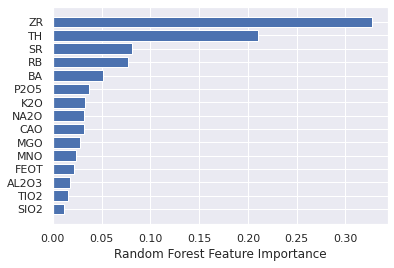

In [289]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 28.50901629632734
Mean Squared Error: 852.7934269939008
Root Mean Squared Error: 29.202627056378006
 
Accuracy: -0.6095454675051444


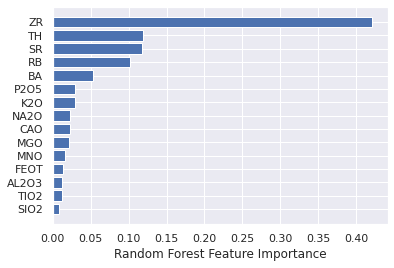

In [290]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 69.3488300961073
Mean Squared Error: 4811.608122779292
Root Mean Squared Error: 69.36575612490137
 
Accuracy: -0.48820122756261286


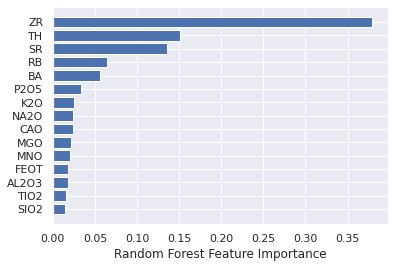

In [291]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

____________________________


## LogisticRegression

- X_train
- Latitude
- Longitude
- SMOTE X_train_res

Feature Importance for LogisticRegression: Different each time
(Appeared a couple times in top 4...)
1. Variable: TIO2                Importance: 1.4
2. Variable: TH                  Importance: 1.3


The most important features keep changing for each sample of training data. The only element that reappears is TiO2. However, this element does not match the top five elements for RandomForestRegression or RandomForestClassifier. The accuracy is decent (~75). 


Mean Absolute Error: 0.19166666666666668
Mean Squared Error: 0.19166666666666668
Root Mean Squared Error: 0.43779751788545657
 
 
Accuracy: 0.8083333333333333
Precision: 0.8135593220338984
Recall: 0.8
 
[[49 11]
 [12 48]]


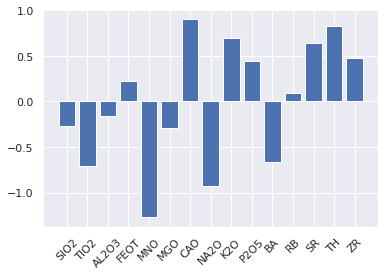

In [292]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Feature Importance for LogisticRegression: 
1. Variable: TH                  Importance: 1.4
2. Variable: CAO                 Importance: 1.3
3. Variable: TIO2                Importance: 0.9
4. Variable: SR                  Importance: 0.85

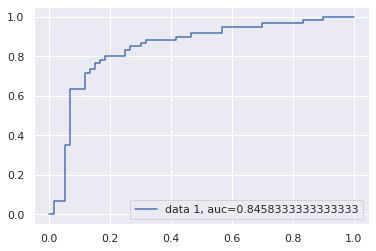

In [293]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Here we see a Reciever operating curve which shows true positives rate against false positive rate. We see that we get a AUC score of 0.91 which is pretty good suggesting that we have a decent classifier. 

Mean Absolute Error: 0.3
Mean Squared Error: 0.3
Root Mean Squared Error: 0.5477225575051661
 
 
Accuracy: 0.7
Precision: 0.6538461538461539
Recall: 0.85
 
[[33 27]
 [ 9 51]]


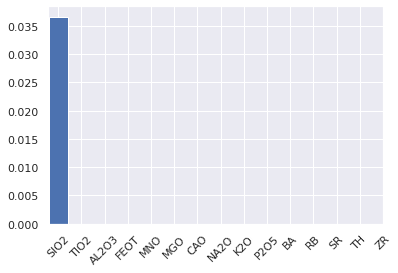

In [294]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

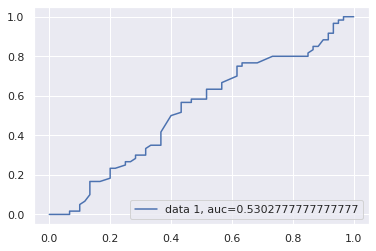

In [295]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
 
 
Accuracy: 0.9
Precision: 0.8529411764705882
Recall: 0.9666666666666667
 
[[50 10]
 [ 2 58]]


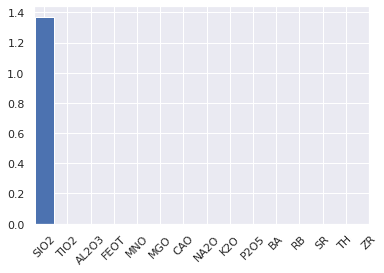

In [296]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

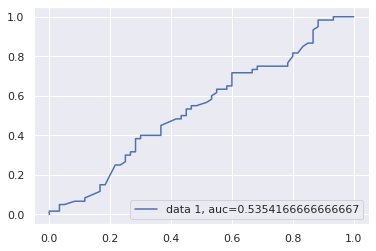

In [297]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Mean Absolute Error: 0.18333333333333332
Mean Squared Error: 0.18333333333333332
Root Mean Squared Error: 0.4281744192888376
 
 
Accuracy: 0.8166666666666667
Precision: 0.8275862068965517
Recall: 0.8
 
[[50 10]
 [12 48]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        60
         1.0       0.83      0.80      0.81        60

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



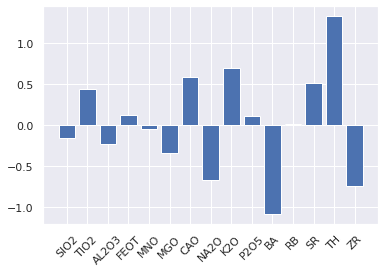

In [298]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

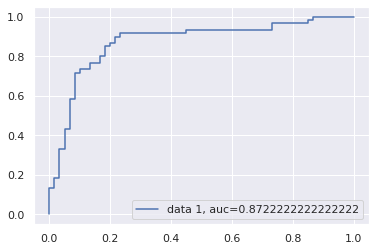

In [299]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( good )

_______

## Junk: Cool Plots?

In [300]:
# Plotting the tree

# Limit depth of tree to 3 levels

#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(X_train[cluster_variables], y_train)

# Extract the small tree

#tree_small = rf_small.estimators_[5]

# Save the tree as a png image

#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');#

In [301]:
# Limit depth of tree to 3 levels

#rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf.fit(X_train[cluster_variables], y_train)
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

# Tree plot

#_ = tree.plot_tree(rf.estimators_[0], feature_names=cluster_variables, filled=True)


In [302]:
#viz = dtreeviz(rf.estimators_[0], X_train[cluster_variables], y_train, feature_names=feature_list, target_name='target')
#viz

In [303]:
# Confusion Matrix ( nice looking plot )


#class_names=[0,1] # name  of classes
#fig, ax = plt.subplots()
#tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)

# create heatmap

#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')

# Ica, Peru Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

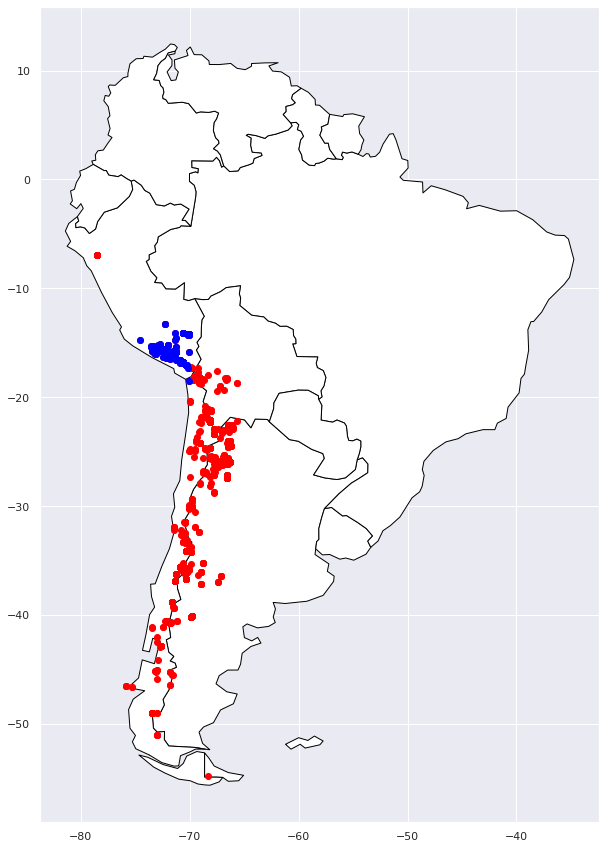

In [304]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat
Ica_Cluster = data_all.loc[(data_all['LATITUDE'] <= -13) & (data_all['LATITUDE'] >= -20) ] 
Ica_Cluster = Ica_Cluster.loc[(Ica_Cluster['LONGITUDE'] <= -70) & (Ica_Cluster['LONGITUDE'] >= -80)]

# Mark samples in cluster with 'target'
Ica_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Ica_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Ica_Cluster, geometry=geopandas.points_from_xy(Ica_Cluster['LONGITUDE'],Ica_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [305]:
len(Ica_Cluster)

161

In [306]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


____________________

        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

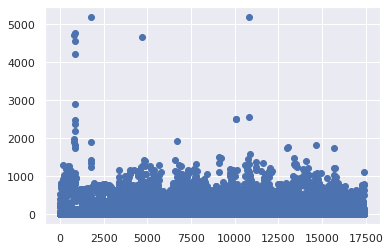

In [307]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [308]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Ica cluster = 161 samples
# 0 = other places = 1000 samples 

# Maybe we should bootstrap? 

0.0    1000
1.0     161
Name: target, dtype: int64

In [309]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

2352    1.0
2454    0.0
1404    0.0
1530    0.0
2095    0.0
       ... 
55      1.0
526     0.0
1536    0.0
2350    1.0
649     1.0
Name: target, Length: 120, dtype: float64
  
1182    1.0
29      1.0
1561    1.0
43      1.0
655     1.0
1658    1.0
1761    1.0
72      1.0
1801    1.0
2538    1.0
1757    1.0
1182    1.0
42      1.0
1559    1.0
634     1.0
1606    1.0
651     1.0
1767    1.0
2084    1.0
2357    1.0
1762    1.0
1765    1.0
1182    1.0
41      1.0
2517    1.0
2344    1.0
64      1.0
655     1.0
2341    1.0
1763    1.0
1778    1.0
637     1.0
652     1.0
1819    1.0
645     1.0
2522    1.0
2352    1.0
1754    1.0
1648    1.0
649     1.0
1768    1.0
55      1.0
1750    1.0
645     1.0
2350    1.0
1662    1.0
640     1.0
55      1.0
2343    1.0
2542    1.0
2344    1.0
645     1.0
43      1.0
59      1.0
2518    1.0
636     1.0
2346    1.0
645     1.0
1802    1.0
1558    1.0
Name: target, dtype: float64


In [310]:
X_train

SAMPLE ID  SOURCE  ... target  id_number
2352    BAR-01-52  GEOROC  ...    1.0       2352
2454        AR269  GEOROC  ...    0.0       2454
1404         M-41  GEOROC  ...    0.0       1404
1530        CG124  GEOROC  ...    0.0       1530
2095        LMN 2  GEOROC  ...    0.0       2095
...           ...     ...  ...    ...        ...
55    COTA-05-09B  GEOROC  ...    1.0         55
526        VQ-04D  GEOROC  ...    0.0        526
1536       PA-011  GEOROC  ...    0.0       1536
2350    PIG-02-92  GEOROC  ...    1.0       2350
649     PIG-02-78  GEOROC  ...    1.0        649

[120 rows x 28 columns]

## SMOTE

In [311]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2000, 15)
After OverSampling, the shape of train_y: (2000,) 

After OverSampling, counts of label '1': 1000
After OverSampling, counts of label '0': 1000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [312]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR        TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000  8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000  4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000  8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000  9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000  8.820000  308.000000
...         ...       ...        ...  ...         ...       ...         ...
1995  64.830339  0.797972  16.326942  ...  830.902353  8.243596  146.690040
1996  70.827373  0.413743  15.012255  ...  653.416996  7.255652  188.799224
1997  70.790045  0.386066  14.379503  ...  516.387271  8.087010  224.571992
1998  74.780879  0.219380  13.500798  ...  940.766193  4.596009  161.165706
1999  70.342456  0.420295  14.573373  ...  439.469474  6.474978  207.398821

[2000 rows x 15 columns]

## Feature Scaling

In [313]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [314]:
# Standardization (Z-score Normalization) 

In [315]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()

# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
2352 -1.309938  0.938064  1.346389  ...       2352  -16.0006   -71.3948
2454 -0.902904  0.853632  0.517005  ...       2454  -25.5668   -67.9537
1404  1.265796 -1.438087 -1.469437  ...       1404  -31.9160   -69.5000
1530 -0.137643  0.656624 -0.178453  ...       1530  -25.9170   -67.3561
2095  1.801985 -1.598909 -2.105751  ...       2095  -36.4300   -67.1500

[5 rows x 18 columns]

In [316]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
57    1.100641 -0.890899 -0.781711  ...         57  -15.2169   -72.8833
1596 -2.481970  1.649986  1.156454  ...       1596  -27.4000   -66.6000
2398 -1.375787  0.730536  1.485727  ...       2398  -33.3599   -70.2588
2532 -1.063064  0.970890  0.640620  ...       2532  -17.0361   -70.3492
573  -0.050364 -0.150762  0.257133  ...        573  -38.7673   -71.6055

[5 rows x 18 columns]

## Scatter Matrix Plots

- Training data
- Testing data
- SMOTE X_train_res

In [317]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [318]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [319]:
# Scatter Plot Matrix - on SMOTE Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA

1. scatter plot all of the principal components in training data
2. transformed PCA scatter
3. Variance vs. Components
4. SMOTE X_train_res

- From scatter plots, we see that it is dificult to cluster our target samples from the other samples. While there are regions where our target samples are located it isn't well separated

- Transformed PCA doesn't seem to do much.

- There are around 1 number of components that explain the variance in the X_training data

In [320]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [321]:
# PCA - training data

pca = PCA(n_components=3)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[-0.36535496  0.33897986  0.31294863  0.33383567  0.15434841  0.32889404
   0.34297817  0.14812027 -0.28458474  0.26192075  0.0953769  -0.1488036
   0.2194248  -0.09162316  0.18244089]
 [ 0.13511119 -0.20104009 -0.09116293 -0.12543846  0.19198296 -0.19331196
  -0.09121974  0.30527918 -0.18199605 -0.28714727  0.31254109 -0.50673165
   0.29937485 -0.40717611  0.12683162]
 [ 0.01135175  0.03280839 -0.02517797 -0.0700998  -0.21379502  0.00258123
  -0.09740131 -0.17446011  0.30851792  0.16056658  0.6335813   0.25022886
   0.47535903  0.16008486  0.26647789]]
 
original shape:    (120, 18)
transformed shape: (120, 3)


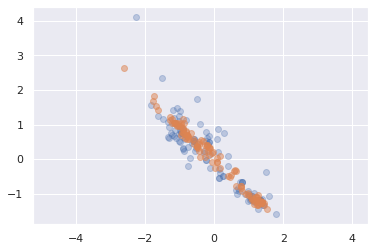

In [322]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5)
plt.axis('equal');

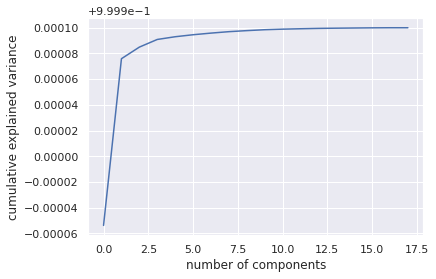

In [323]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [334]:
# Visualize all PCA components - SMOTE Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [331]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.38593626  0.36208943  0.32388171  0.34916039  0.07477027  0.32652113
   0.35817471  0.14284262 -0.25820714  0.2882967   0.04404076 -0.11135412
   0.2197196  -0.07999651  0.11589196]
 [-0.09589679  0.09476742  0.11691836  0.02424637 -0.09999755  0.21215942
   0.042386   -0.44401527  0.29951777  0.28698971 -0.06842437  0.52100518
  -0.15776783  0.49020255 -0.01470981]
 [ 0.04484987 -0.04246641  0.00226565 -0.12192708 -0.08774645 -0.07824009
  -0.10435912 -0.00874384  0.17177582  0.08852326  0.66295491  0.21893382
   0.43148314 -0.10398692  0.48451007]
 [ 0.03474657  0.09671785 -0.13018453  0.15153881  0.1695551  -0.16070996
  -0.06354338  0.38578917 -0.3001292  -0.1396984  -0.12920222  0.26082016
  -0.29509318  0.3628944   0.57357891]]
 
original shape:    (2000, 15)
transformed shape: (2000, 4)


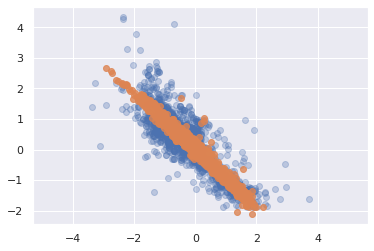

In [332]:
X_new_res = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new_res[:, 0], X_new_res[:, 1], alpha=0.8)
plt.axis('equal');

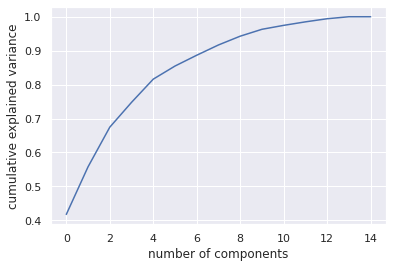

In [330]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## RandomForestClassifier

- X_train
- Second time X_train
- X_test
- Long on y_train
- Lat on y_train

Feature Importance: changes each time 
( elements that are consistantly present in top 4)
1. Variable: BA                    Importance: 0.12
2. Variable: K2O                   Importance: 0.16

- BA and K2O ( when available) are the top imporant features that keep occuring which represents ~50% of the samples variance 

- Randomforest on Latitude is more accurate than Longitude



In [79]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.7333333333333333]
 
[[47 13]
 [19 41]]


We get an accuracy around 80%

In [80]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: K2O                  Importance: 0.17
Variable: TH                   Importance: 0.12
Variable: FEOT                 Importance: 0.11
Variable: TIO2                 Importance: 0.09
Variable: BA                   Importance: 0.08
Variable: CAO                  Importance: 0.07
Variable: SR                   Importance: 0.06
Variable: ZR                   Importance: 0.05
Variable: SIO2                 Importance: 0.04
Variable: AL2O3                Importance: 0.04
Variable: MNO                  Importance: 0.04
Variable: NA2O                 Importance: 0.04
Variable: P2O5                 Importance: 0.03
Variable: RB                   Importance: 0.03
Variable: MGO                  Importance: 0.02


In [81]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['BA','K2O']], y_train)
pred = rf.predict(X_train[['BA','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.45]
 
[[25 35]
 [31 29]]


Using the top 4 features, we get an accuracy of ~50% which suggests that BA and K2O tell the majority of the story for these samples

In [82]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8833333333333333]
 
[[54  6]
 [ 8 52]]


In [83]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.825]
 
[[39 21]
 [ 0 60]]


In [84]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [0.975]
 
[[58  2]
 [ 1 59]]


Latitude is a better determination of the target than Longitue is using randomforestclassifier

##RandomForestRegression

- Geochemistry
- Latitude
- Longitude


Feature Importance for RandomForestRegression: 
1. Variable: ZR                   Importance: 0.21
2. Variable: TH                   Importance: 0.1
3. Variable: SR                   Importance: 0.09
4. Variable: RB                   Importance: 0.085

For geochemistry, Longitude, and Latitude these four elements are the most important. Elements are different from the RandomForestClassifier. Elements of importantance are the same in Salta, Argentina for RandomForestClassifier. Low accuracy score. Might need more samples. 


Mean Absolute Error: 0.30565
Mean Squared Error: 0.14471978333333332
Root Mean Squared Error: 0.38042053484707333
 
Accuracy: 0.4211208666666667


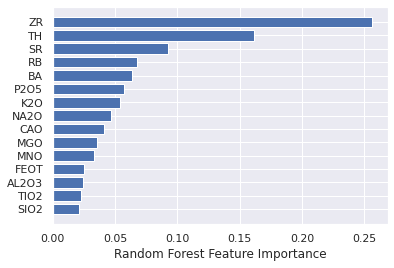

In [85]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 23.317187517974823
Mean Squared Error: 568.6292835483673
Root Mean Squared Error: 23.845948996598295
 
Accuracy: -0.5387820166609514


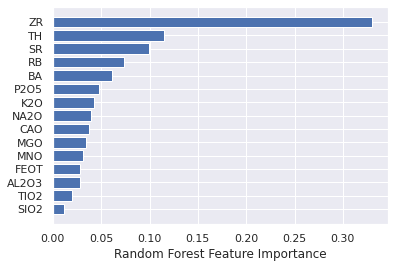

In [86]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 70.74475565642526
Mean Squared Error: 5007.3068941384445
Root Mean Squared Error: 70.76232679991836
 
Accuracy: -0.42891286804284


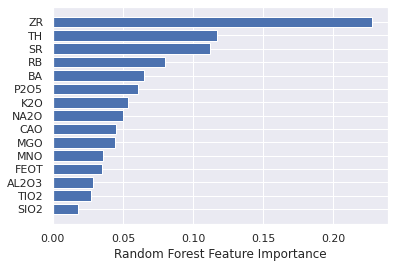

In [87]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

## LogisticRegression

- X_train
- Latitude
- Longitude
- SMOTE X_train_res

Feature Importance for RandomForestRegression: changes each time ( elements that are consistantly present in top 4)
1. Variable: BA                   Importance: 1.3
2. Variable: K2O                  Importance: 0.8

Elements that are important mimick those of RandomForestClassifier. AUC score for the case is decent ~83. Lat and Long are poor classifiers. 


Mean Absolute Error: 0.23333333333333334
Mean Squared Error: 0.23333333333333334
Root Mean Squared Error: 0.48304589153964794
 
 
Accuracy: 0.7666666666666667
Precision: 0.75
Recall: 0.8
 
[[44 16]
 [12 48]]


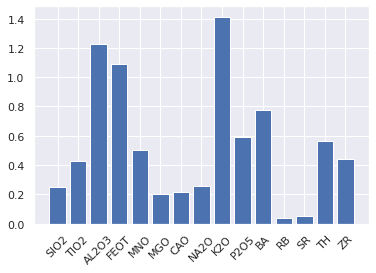

In [88]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Feature Importance for RandomForestRegression: 
1. Variable: AL2O3                Importance: 1.3
2. Variable: BA                   Importance: 0.8
3. Variable: TH                   Importance: 0.75
4. Variable: ZR                   Importance: 0.7

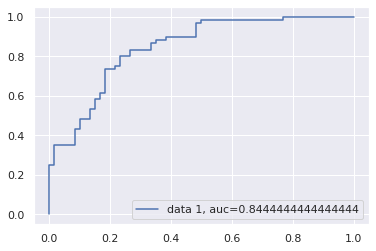

In [89]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.83. ( good )

Mean Absolute Error: 0.025
Mean Squared Error: 0.025
Root Mean Squared Error: 0.15811388300841897
 
 
Accuracy: 0.975
Precision: 0.9672131147540983
Recall: 0.9833333333333333
 
[[58  2]
 [ 1 59]]


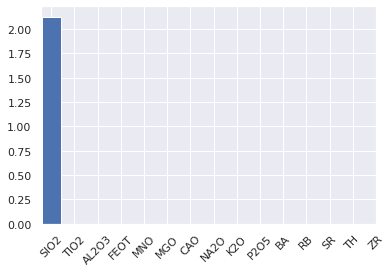

In [90]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

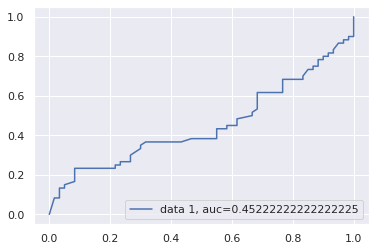

In [91]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.66. (BAD )

Mean Absolute Error: 0.21666666666666667
Mean Squared Error: 0.21666666666666667
Root Mean Squared Error: 0.4654746681256314
 
 
Accuracy: 0.7833333333333333
Precision: 0.765625
Recall: 0.8166666666666667
 
[[45 15]
 [11 49]]


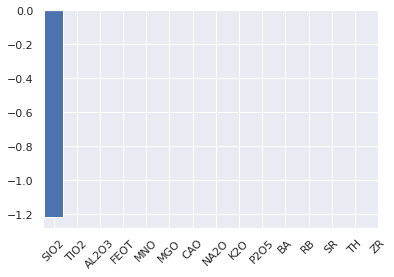

In [92]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

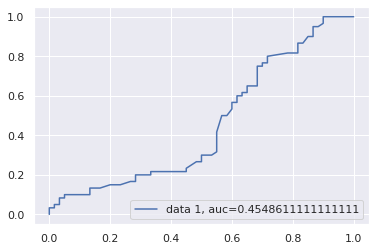

In [93]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.62. ( bad )

Mean Absolute Error: 0.20833333333333334
Mean Squared Error: 0.20833333333333334
Root Mean Squared Error: 0.45643546458763845
 
 
Accuracy: 0.7916666666666666
Precision: 0.7868852459016393
Recall: 0.8
 
[[47 13]
 [12 48]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        60
         1.0       0.79      0.80      0.79        60

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



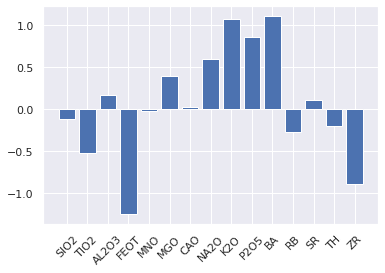

In [94]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

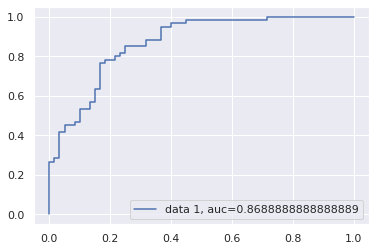

In [95]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.86. ( good )

# Zapala, Argentina Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

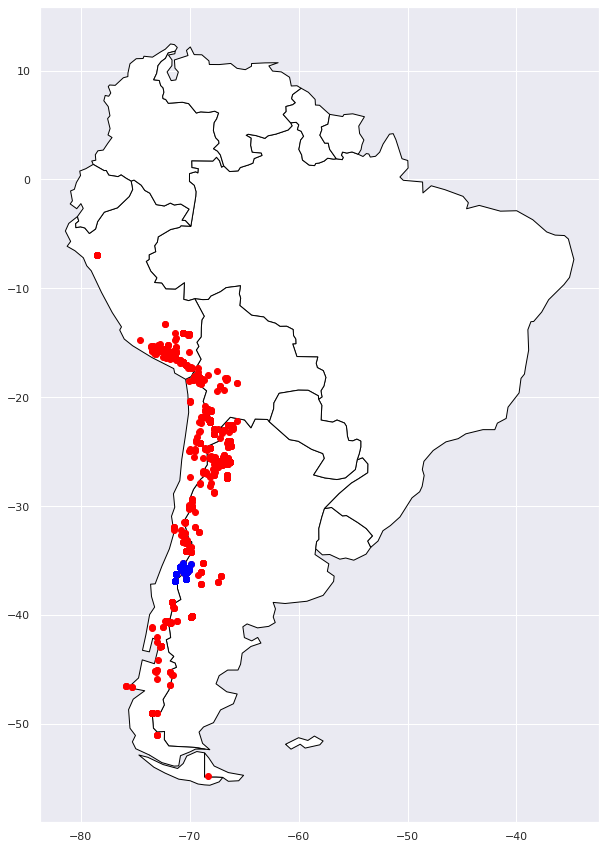

In [96]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat

Zapala_Cluster = data_all.loc[(data_all['LATITUDE'] <= -35) & (data_all['LATITUDE'] >= -38) ] 
Zapala_Cluster = Zapala_Cluster.loc[(Zapala_Cluster['LONGITUDE'] <= -69.5) & (Zapala_Cluster['LONGITUDE'] >= -73)]



# Mark samples in cluster with 'target'
Zapala_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Zapala_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Zapala_Cluster, geometry=geopandas.points_from_xy(Zapala_Cluster['LONGITUDE'],Zapala_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [97]:
len(Zapala_Cluster)

121

In [98]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


______________

        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

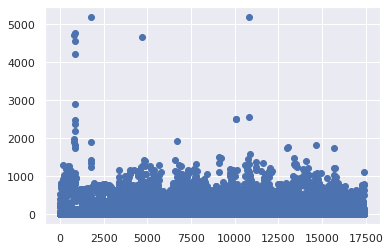

In [99]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [100]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Zapala cluster = 136 samples
# 0 = other places = 1025 samples 

# Maybe we should bootstrap? 

0.0    1040
1.0     121
Name: target, dtype: int64

In [101]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

452     1.0
1061    1.0
1508    0.0
2351    0.0
1247    0.0
       ... 
830     1.0
1424    0.0
2777    0.0
808     1.0
2528    0.0
Name: target, Length: 120, dtype: float64
  
147     1.0
585     1.0
2964    1.0
811     1.0
830     1.0
1045    1.0
526     1.0
442     1.0
593     1.0
585     1.0
821     1.0
2683    1.0
493     1.0
587     1.0
603     1.0
506     1.0
556     1.0
1036    1.0
662     1.0
659     1.0
829     1.0
1323    1.0
586     1.0
1333    1.0
1061    1.0
542     1.0
808     1.0
2957    1.0
658     1.0
602     1.0
591     1.0
597     1.0
133     1.0
661     1.0
503     1.0
661     1.0
452     1.0
438     1.0
125     1.0
542     1.0
1059    1.0
592     1.0
521     1.0
1333    1.0
516     1.0
438     1.0
556     1.0
660     1.0
2680    1.0
506     1.0
507     1.0
1057    1.0
145     1.0
532     1.0
138     1.0
556     1.0
822     1.0
823     1.0
544     1.0
124     1.0
Name: target, dtype: float64


In [102]:
X_train

SAMPLE ID       SOURCE  ... target  id_number
452   PETDB-2826-220  EARTHCHEMDB  ...    1.0        452
1061             11E       GEOROC  ...    1.0       1061
1508         SAF315P       GEOROC  ...    0.0       1508
2351      PIG-03-115       GEOROC  ...    0.0       2351
1247       AP2-00-46       GEOROC  ...    0.0       1247
...              ...          ...  ...    ...        ...
830             LCI2       GEOROC  ...    1.0        830
1424           88069       GEOROC  ...    0.0       1424
2777           CG276       GEOROC  ...    0.0       2777
808              AB1       GEOROC  ...    1.0        808
2528        TU-12-14       GEOROC  ...    0.0       2528

[120 rows x 28 columns]

## SMOTE


In [103]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2080, 15)
After OverSampling, the shape of train_y: (2080,) 

After OverSampling, counts of label '1': 1040
After OverSampling, counts of label '0': 1040


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [104]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR         TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000   8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000   4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000   8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000   9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000   8.820000  308.000000
...         ...       ...        ...  ...         ...        ...         ...
2075  67.700900  1.328877  13.071121  ...  100.635735   4.170168  165.373544
2076  65.385809  0.529348  17.512209  ...  562.869216   2.296539  127.348088
2077  64.304751  0.592081  17.337688  ...  585.530775   1.307770  125.530775
2078  65.524379  0.800244  15.800450  ...  326.733607  17.942213  283.599897
2079  68.263986  0.524383  15.879170  ...  241.045547  12.375511  318.119104

[2080 rows x 15 columns]

## Feature Scaling

In [105]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [106]:
# Standardization (Z-score Normalization) 

In [107]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()

# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
452   1.752124 -1.533593 -1.413769  ...        452  -36.0917   -70.5167
1061 -1.013616  1.390124 -0.263459  ...       1061  -36.8630   -71.3770
1508  0.355836  0.132009 -0.439922  ...       1508  -25.9773   -67.2278
2351  1.755041 -1.553967 -1.843130  ...       2351  -16.1800   -71.4300
1247 -0.902776  0.539495  0.602812  ...       1247  -21.2200   -68.4683

[5 rows x 18 columns]

In [108]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
2522 -0.825278  0.821643  0.528821  ...       2522  -17.0040   -70.3043
604  -0.559328  1.304310  0.388170  ...        604  -35.5800   -70.7500
1263 -1.010719  0.717620  0.109279  ...       1263  -21.2341   -68.3972
2475  2.121914 -1.808058 -1.966730  ...       2475  -25.6193   -67.7251
1035 -0.782608  1.046333  0.187240  ...       1035  -36.8600   -71.3800

[5 rows x 18 columns]

## Scatter Matrix Plots

- Training data
- Testing data
- SMOTE X_train_res

In [109]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [110]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [111]:
# Scatter Plot Matrix - on SMOTE Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA

1. scatter plot all of the principal components in training data
2. transformed PCA scatter
3. Variance vs. Components
4. SMOTE X_train_res

- From scatter plots, we see that it is dificult to cluster our target samples from the other samples. While there are regions where our target samples are located it isn't well separated

- Transformed PCA doesn't seem to do much. Potentially see two clusters within the data?

- There are around 1 number of components that explain the variance in the X_training data

In [112]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [113]:
# PCA - training data

pca = PCA(n_components=3)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.3748807  -0.31667854 -0.28639622 -0.33448359 -0.14598568 -0.32836825
  -0.36811203 -0.15379647  0.29565485 -0.2821713   0.12124956  0.18719604
  -0.20367554  0.13420632 -0.02661674]
 [-0.02884632  0.20099487 -0.107461    0.16149676  0.15421677 -0.01172997
  -0.06962037  0.03275049  0.00114755  0.11225305 -0.49829367  0.24549057
  -0.51647222  0.35467281  0.42142529]
 [-0.087386   -0.02989602  0.23027954 -0.04073093 -0.19778921  0.23901668
   0.12009538 -0.48729996  0.24073121  0.25371333 -0.13158002  0.40648739
   0.10413669  0.33815775 -0.39822878]]
 
original shape:    (120, 18)
transformed shape: (120, 3)


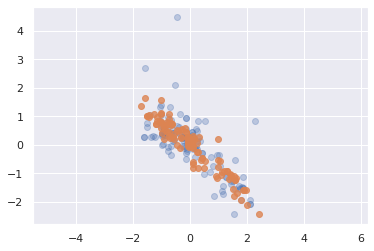

In [114]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

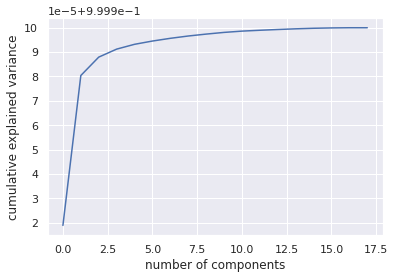

In [115]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [116]:
# Visualize all PCA components - SMOTE Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [117]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.37993089  0.32904818  0.31581072  0.32684312  0.12208746  0.33674125
   0.36411504  0.13367825 -0.27449329  0.27973204 -0.05680909 -0.19345403
   0.21259674 -0.14917112  0.01922548]
 [-0.10278571  0.13579676  0.06995022  0.042964   -0.08638675  0.13779109
   0.06287964 -0.41620898  0.34215523  0.29635789  0.35883008  0.48546723
   0.21621171  0.31909502  0.2066828 ]
 [ 0.03707615 -0.04028282  0.0064641  -0.03407197  0.06145727 -0.18905768
  -0.10890342  0.34211881 -0.12304934 -0.13483496  0.54969265 -0.02116405
   0.29501341 -0.2952537   0.56323684]
 [-0.03498462  0.3063605  -0.17183864  0.2217728   0.34065054 -0.14907248
  -0.12492008  0.27600438 -0.02790438  0.14245499 -0.21098712  0.17828713
  -0.47162477  0.32084568  0.41642883]]
 
original shape:    (2080, 15)
transformed shape: (2080, 4)


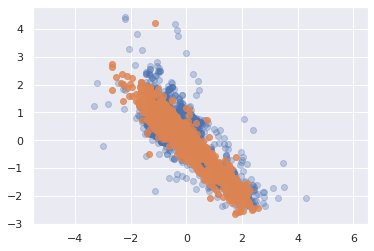

In [118]:
X_new_res = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new_res[:, 0], X_new_res[:, 1], alpha=0.8)
plt.axis('equal');

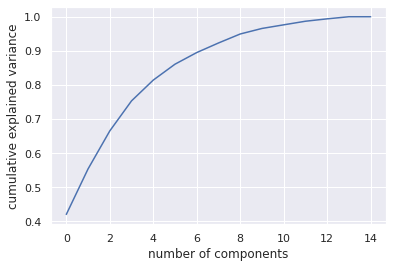

In [119]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## RandomForestClassifier

- X_train
- Second time X_train
- X_test
- Long on y_train
- Lat on y_train

Feature Importance: changes each time 
( elements that are consistantly present in top 4)
1. Variable: BA                    Importance: 0.12
2. Variable: K2O                   Importance: 0.16

- BA and K2O ( when available) are the top imporant features that keep occuring which represents ~50% of the samples variance 

- Randomforest on Latitude is more accurate than Longitude



In [120]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8416666666666667]
 
[[52  8]
 [11 49]]


In [121]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: NA2O                 Importance: 0.27
Variable: ZR                   Importance: 0.14
Variable: K2O                  Importance: 0.13
Variable: RB                   Importance: 0.11
Variable: MNO                  Importance: 0.06
Variable: BA                   Importance: 0.06
Variable: TH                   Importance: 0.06
Variable: P2O5                 Importance: 0.05
Variable: TIO2                 Importance: 0.02
Variable: AL2O3                Importance: 0.02
Variable: MGO                  Importance: 0.02
Variable: CAO                  Importance: 0.02
Variable: SR                   Importance: 0.02
Variable: SIO2                 Importance: 0.01
Variable: FEOT                 Importance: 0.01


In [122]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['BA','K2O']], y_train)
pred = rf.predict(X_train[['BA','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.5]
 
[[30 30]
 [30 30]]


In [123]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9166666666666666]
 
[[53  7]
 [ 3 57]]


In [124]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.925]
 
[[53  7]
 [ 2 58]]


In [125]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [0.975]
 
[[57  3]
 [ 0 60]]


##RandomForestRegression

- Geochemistry
- Latitude
- Longitude


Feature Importance for RandomForestRegression: 
1. Variable: ZR                   Importance: 0.21
2. Variable: TH                   Importance: 0.1
3. Variable: SR                   Importance: 0.09
4. Variable: RB                   Importance: 0.085

For geochemistry, Longitude, and Latitude these four elements are the most important. Elements are different from the RandomForestClassifier. Elements of importantance are the same in Salta, Argentina for RandomForestClassifier. Low accuracy score. Might need more samples. 


Mean Absolute Error: 0.181975
Mean Squared Error: 0.08451179166666666
Root Mean Squared Error: 0.2907091186506998
 
Accuracy: 0.6619528333333332


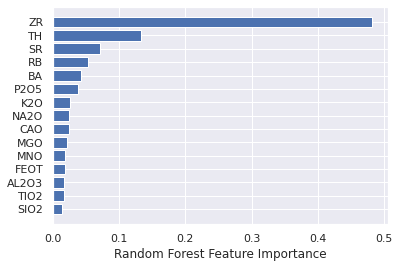

In [126]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 29.886700905587126
Mean Squared Error: 921.2564449409671
Root Mean Squared Error: 30.35220659097073
 
Accuracy: -0.36800191787197195


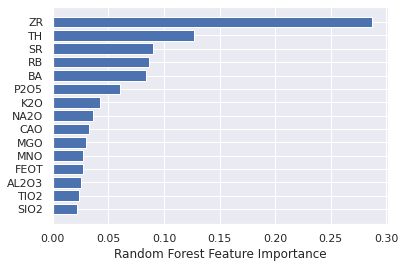

In [127]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 70.2621953241666
Mean Squared Error: 4939.349103319737
Root Mean Squared Error: 70.28050300986567
 
Accuracy: -0.7424105269310852


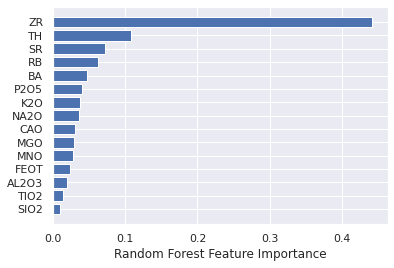

In [128]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

## LogisticRegression

- X_train
- Latitude
- Longitude
- SMOTE X_train_res

Feature Importance for RandomForestRegression: changes each time ( elements that are consistantly present in top 4)
1. Variable: BA                   Importance: 1.3
2. Variable: K2O                  Importance: 0.8

Elements that are important mimick those of RandomForestClassifier. AUC score for the case is decent ~83. Lat and Long are poor classifiers. 


Mean Absolute Error: 0.11666666666666667
Mean Squared Error: 0.11666666666666667
Root Mean Squared Error: 0.3415650255319866
 
 
Accuracy: 0.8833333333333333
Precision: 0.896551724137931
Recall: 0.8666666666666667
 
[[54  6]
 [ 8 52]]


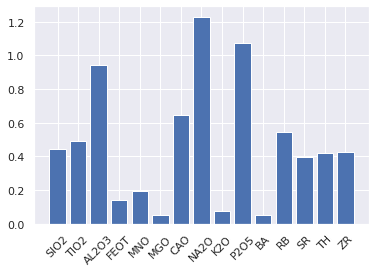

In [129]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

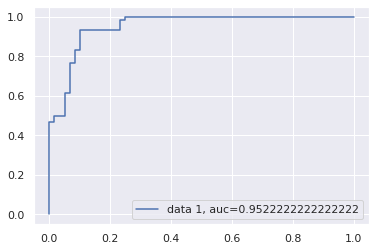

In [130]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.83. ( good )

Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287
 
 
Accuracy: 0.9166666666666666
Precision: 0.8571428571428571
Recall: 1.0
 
[[50 10]
 [ 0 60]]


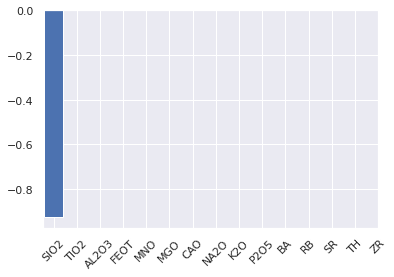

In [131]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

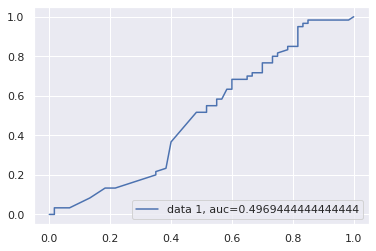

In [132]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.66. (BAD )

Mean Absolute Error: 0.14166666666666666
Mean Squared Error: 0.14166666666666666
Root Mean Squared Error: 0.3763863263545405
 
 
Accuracy: 0.8583333333333333
Precision: 0.7866666666666666
Recall: 0.9833333333333333
 
[[44 16]
 [ 1 59]]


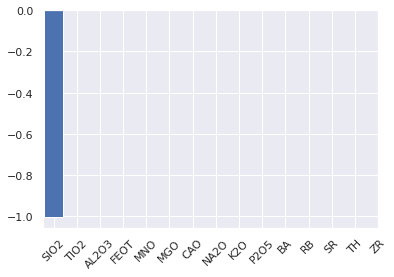

In [133]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

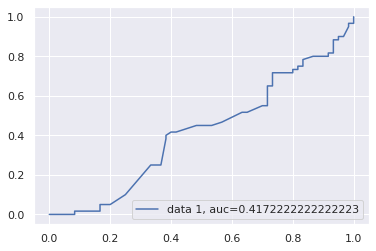

In [134]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.58. ( bad )

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
 
 
Accuracy: 0.9
Precision: 0.9137931034482759
Recall: 0.8833333333333333
 
[[55  5]
 [ 7 53]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        60
         1.0       0.91      0.88      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



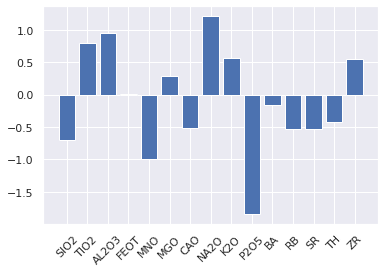

In [135]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

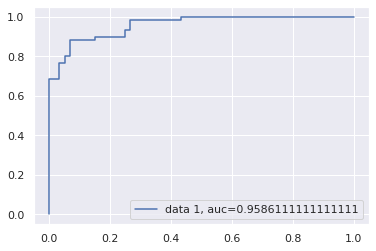

In [136]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.96. ( good )

# Chaitén, Chile Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

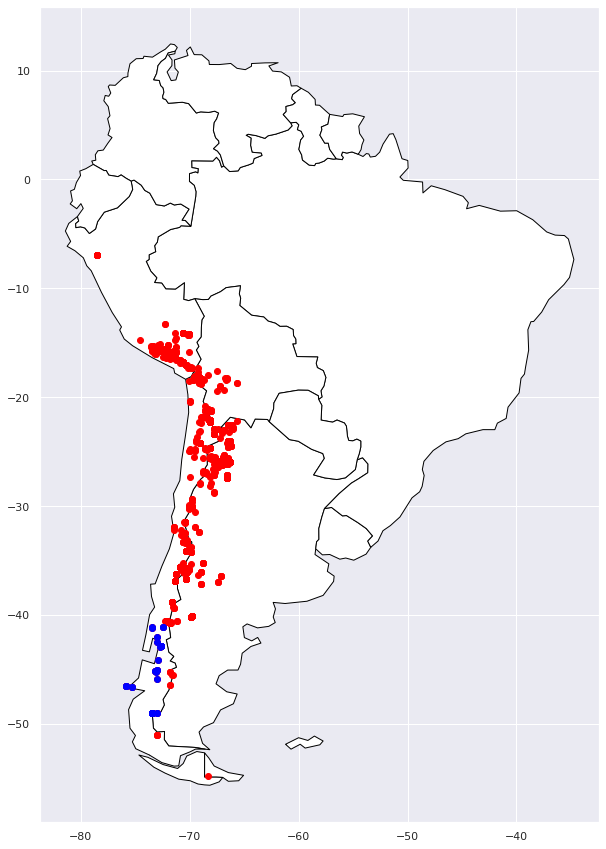

In [137]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat

Chaiten_Cluster = data_all.loc[(data_all['LATITUDE'] <= -41) & (data_all['LATITUDE'] >= -50) ] 
Chaiten_Cluster = Chaiten_Cluster.loc[(Chaiten_Cluster['LONGITUDE'] <= -72) & (Chaiten_Cluster['LONGITUDE'] >= -80)]



# Mark samples in cluster with 'target'
Chaiten_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Chaiten_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Chaiten_Cluster, geometry=geopandas.points_from_xy(Chaiten_Cluster['LONGITUDE'],Chaiten_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [138]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

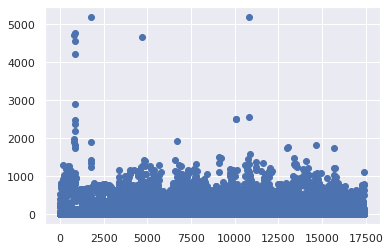

In [139]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [140]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Zapala cluster = 169 samples
# 0 = other places = 992 samples 

# Maybe we should bootstrap? 

0.0    1116
1.0      45
Name: target, dtype: int64

In [141]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

1806    0.0
846     0.0
1677    1.0
2065    1.0
420     0.0
       ... 
1683    1.0
2373    0.0
2065    1.0
155     1.0
2327    0.0
Name: target, Length: 120, dtype: float64
  
1629    1.0
1842    1.0
1668    1.0
158     1.0
1667    1.0
1669    1.0
1842    1.0
1674    1.0
1684    1.0
2065    1.0
152     1.0
1680    1.0
1623    1.0
1629    1.0
1835    1.0
1683    1.0
1842    1.0
1667    1.0
1675    1.0
1665    1.0
1625    1.0
161     1.0
1670    1.0
2079    1.0
1842    1.0
1625    1.0
1665    1.0
2079    1.0
1678    1.0
1677    1.0
1842    1.0
1834    1.0
2123    1.0
1641    1.0
2065    1.0
152     1.0
1678    1.0
1683    1.0
1629    1.0
2191    1.0
1684    1.0
152     1.0
1674    1.0
1834    1.0
0       1.0
1670    1.0
154     1.0
1668    1.0
1625    1.0
1625    1.0
2123    1.0
1674    1.0
1665    1.0
2123    1.0
155     1.0
1680    1.0
2191    1.0
2065    1.0
1641    1.0
1838    1.0
Name: target, dtype: float64


In [142]:
X_train

SAMPLE ID  SOURCE  ... target  id_number
1806     TC-07  GEOROC  ...    0.0       1806
846       Q3-1  GEOROC  ...    0.0        846
1677     LT2A1  GEOROC  ...    1.0       1677
2065   CHA-001  GEOROC  ...    1.0       2065
420   PU-03-21  GEOROC  ...    0.0        420
...        ...     ...  ...    ...        ...
1683      VD-3  GEOROC  ...    1.0       1683
2373     H-008  GEOROC  ...    0.0       2373
2065   CHA-001  GEOROC  ...    1.0       2065
155      MT5-A  GEOROC  ...    1.0        155
2327     85-28  GEOROC  ...    0.0       2327

[120 rows x 28 columns]

## SMOTE

In [143]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2232, 15)
After OverSampling, the shape of train_y: (2232,) 

After OverSampling, counts of label '1': 1116
After OverSampling, counts of label '0': 1116


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [144]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR         TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000   8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000   4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000   8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000   9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000   8.820000  308.000000
...         ...       ...        ...  ...         ...        ...         ...
2227  66.618953  0.548876  16.689248  ...  507.402325  11.946744  138.934883
2228  74.101546  0.265916  14.085543  ...  104.493709   9.319497   61.023808
2229  75.317726  0.140000  14.036310  ...  147.862014  12.937240  107.862014
2230  75.257917  0.149355  14.006647  ...  143.215102  12.500256  100.137860
2231  65.927061  0.890040  16.937052  ...  245.995415   8.666820  346.785455

[2232 rows x 15 columns]

## Feature Scaling

In [145]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [146]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()

# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
1806 -0.806546  0.621324  0.471574  ...       1806  -16.7625   -70.5922
846  -1.066818  2.360677 -0.038988  ...        846  -39.3000   -71.4500
1677 -0.484749  0.214061  0.395549  ...       1677  -49.0197   -73.5035
2065  1.394379 -1.067121 -0.438493  ...       2065  -42.9160   -72.7160
420   0.418863 -0.642889 -1.172659  ...        420  -40.5846   -72.0980

[5 rows x 18 columns]

In [147]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
1839 -0.879991  1.398940  0.243200  ...       1839  -45.0470   -72.9880
1672 -0.716191  0.129960  1.130813  ...       1672  -49.0197   -73.5035
171   1.281243 -1.351148 -0.972376  ...        171  -42.8329   -72.6640
1672 -0.716191  0.129960  1.130813  ...       1672  -49.0197   -73.5035
846  -1.139533  2.277756  0.170406  ...        846  -39.3000   -71.4500

[5 rows x 18 columns]

## Scatter Matrix Plots

In [148]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [149]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [150]:
# Scatter Plot Matrix - on SMOTE Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA

In [151]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [152]:
# PCA - training data

pca = PCA(n_components=1)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.38919401 -0.34818925 -0.3188647  -0.35720061 -0.22696158 -0.32566376
  -0.35561151 -0.10672869  0.2394989  -0.22477226  0.05114291  0.18464902
  -0.18443229  0.15312295 -0.02347861]]
 
original shape:    (120, 18)
transformed shape: (120, 1)


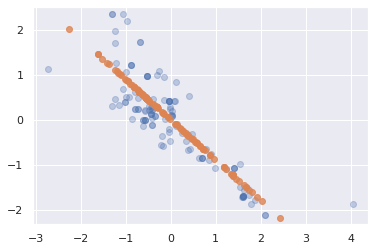

In [153]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

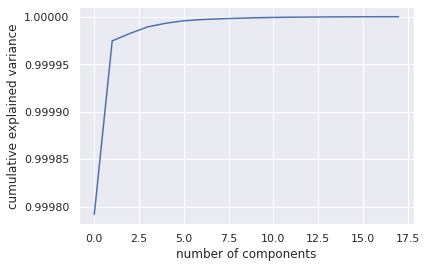

In [154]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [155]:
# Visualize all PCA components - SMOTE Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [156]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.38199521  0.34526876  0.33051073  0.34380565  0.1230974   0.33841081
   0.35818409  0.07961362 -0.23456873  0.28356694 -0.02986536 -0.16772601
   0.2380269  -0.13142354  0.06881028]
 [-0.09900344  0.1197444   0.05537119  0.0265868  -0.06737567  0.08825578
   0.0066833  -0.34199153  0.39404944  0.24140494  0.34269554  0.50008538
   0.19699006  0.3865101   0.27107797]
 [ 0.04017596  0.04794435 -0.08577801  0.05293742  0.20520868 -0.24635957
  -0.16735197  0.4579201  -0.09486778 -0.03117967  0.4748863   0.0155144
   0.08090382 -0.26625747  0.57641793]
 [-0.07068607  0.26222422 -0.11308108  0.24123407  0.46482358 -0.16066696
  -0.1545771   0.17128424  0.15852371  0.27477711 -0.34765823  0.15115809
  -0.52317151  0.20419175  0.02008956]]
 
original shape:    (2232, 15)
transformed shape: (2232, 4)


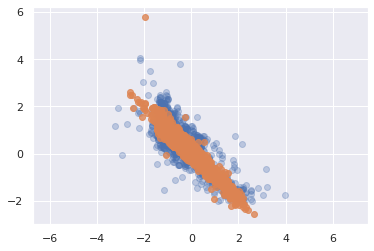

In [157]:
X_new_res = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new_res[:, 0], X_new_res[:, 1], alpha=0.8)
plt.axis('equal');

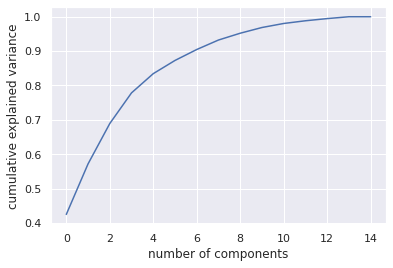

In [158]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## RandomForestClassifier

In [159]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8666666666666667]
 
[[52  8]
 [ 8 52]]


In [160]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: K2O                  Importance: 0.19
Variable: TH                   Importance: 0.17
Variable: RB                   Importance: 0.12
Variable: AL2O3                Importance: 0.1
Variable: BA                   Importance: 0.08
Variable: FEOT                 Importance: 0.07
Variable: NA2O                 Importance: 0.06
Variable: SR                   Importance: 0.04
Variable: ZR                   Importance: 0.04
Variable: SIO2                 Importance: 0.03
Variable: P2O5                 Importance: 0.03
Variable: MNO                  Importance: 0.02
Variable: CAO                  Importance: 0.02
Variable: TIO2                 Importance: 0.01
Variable: MGO                  Importance: 0.01


In [161]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['BA','K2O']], y_train)
pred = rf.predict(X_train[['BA','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.5083333333333333]
 
[[27 33]
 [26 34]]


In [162]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9]
 
[[49 11]
 [ 1 59]]


In [163]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9833333333333333]
 
[[58  2]
 [ 0 60]]


In [164]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [1.0]
 
[[60  0]
 [ 0 60]]


## RandomForestRegression

Mean Absolute Error: 0.29402500000000004
Mean Squared Error: 0.14942509166666665
Root Mean Squared Error: 0.38655541862282394
 
Accuracy: 0.4022996333333334


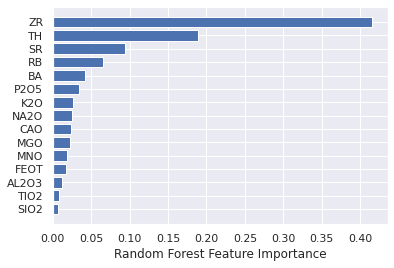

In [165]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 35.14956526271639
Mean Squared Error: 1317.3016756010677
Root Mean Squared Error: 36.29465078494444
 
Accuracy: -0.6824013927668109


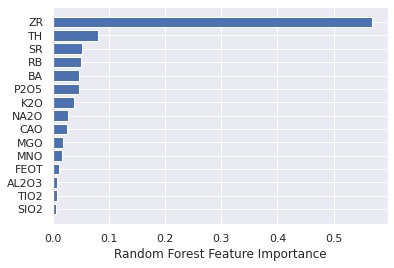

In [166]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 72.05972134281107
Mean Squared Error: 5198.742881719294
Root Mean Squared Error: 72.10230843543981
 
Accuracy: -0.47737625122129046


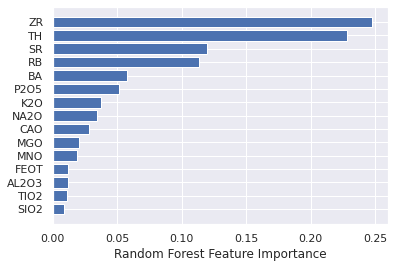

In [167]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

## LogisticRegression

Mean Absolute Error: 0.09166666666666666
Mean Squared Error: 0.09166666666666666
Root Mean Squared Error: 0.30276503540974914
 
 
Accuracy: 0.9083333333333333
Precision: 0.855072463768116
Recall: 0.9833333333333333
 
[[50 10]
 [ 1 59]]


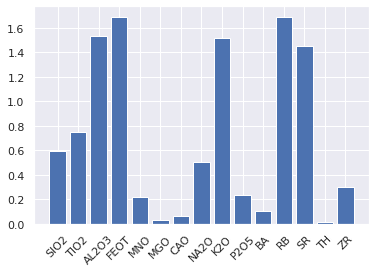

In [168]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

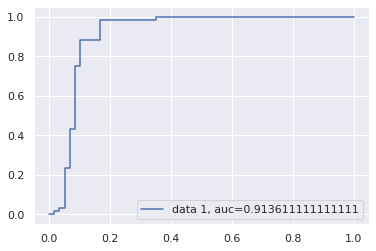

In [169]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.83. ( good )

Mean Absolute Error: 0.008333333333333333
Mean Squared Error: 0.008333333333333333
Root Mean Squared Error: 0.09128709291752768
 
 
Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9833333333333333
 
[[60  0]
 [ 1 59]]


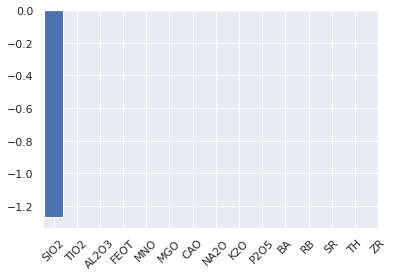

In [170]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

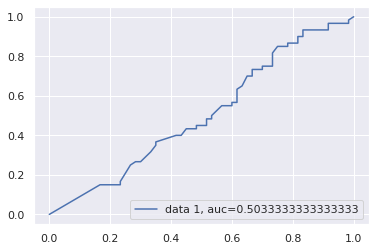

In [171]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.66. (BAD )

Mean Absolute Error: 0.016666666666666666
Mean Squared Error: 0.016666666666666666
Root Mean Squared Error: 0.12909944487358055
 
 
Accuracy: 0.9833333333333333
Precision: 0.967741935483871
Recall: 1.0
 
[[58  2]
 [ 0 60]]


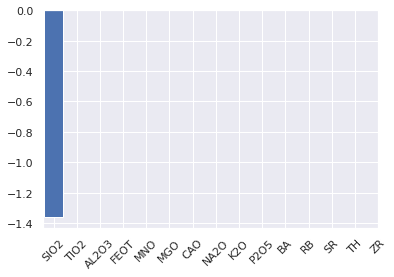

In [172]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

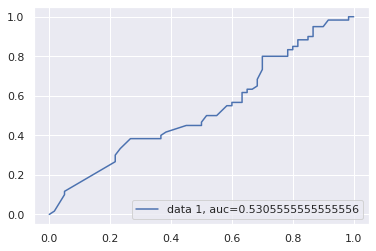

In [173]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.50. ( bad )

Mean Absolute Error: 0.075
Mean Squared Error: 0.075
Root Mean Squared Error: 0.27386127875258304
 
 
Accuracy: 0.925
Precision: 0.8805970149253731
Recall: 0.9833333333333333
 
[[52  8]
 [ 1 59]]
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92        60
         1.0       0.88      0.98      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



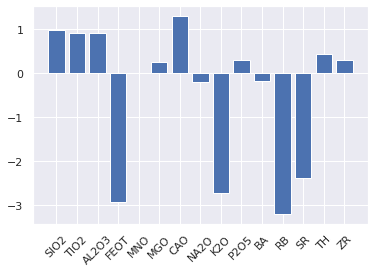

In [174]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

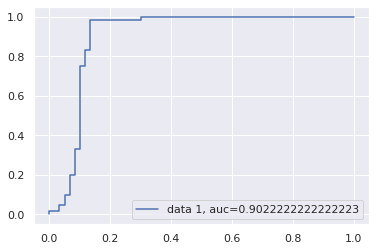

In [175]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.90. ( good )

# Testing - Longitude



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

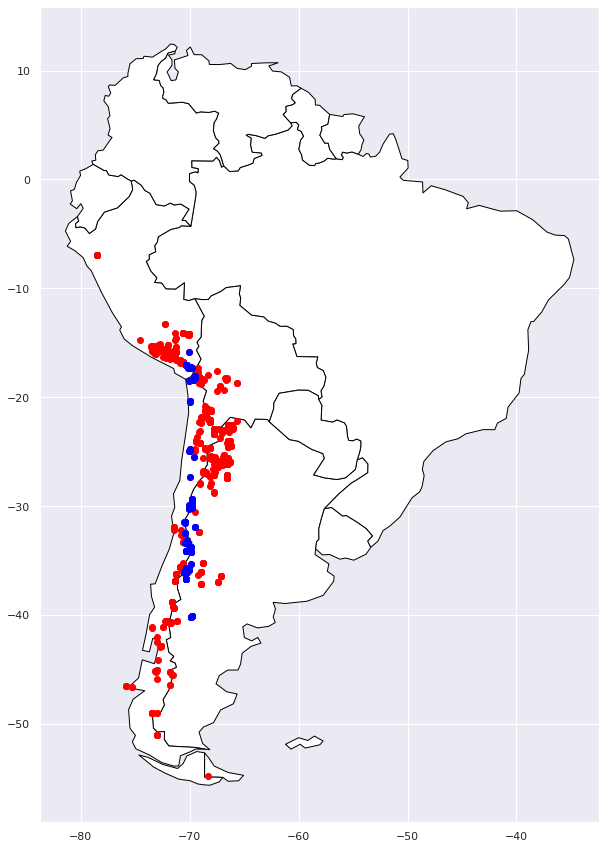

In [340]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat
#Zapala_Cluster = data_all.loc[(data_all['LATITUDE'] <= -31) & (data_all['LATITUDE'] >= -38) ] 
#Zapala_Cluster = Zapala_Cluster.loc[(Zapala_Cluster['LONGITUDE'] <= -69.5) & (Zapala_Cluster['LONGITUDE'] >= -71.2)]


Long_Cluster = data_all.loc[(data_all['LATITUDE'] <= -15) & (data_all['LATITUDE'] >= -55) ] 
Long_Cluster = Long_Cluster.loc[(Long_Cluster['LONGITUDE'] <= -69.5) & (Long_Cluster['LONGITUDE'] >= -70.5)]



# Mark samples in cluster with 'target'
Long_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Long_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Long_Cluster, geometry=geopandas.points_from_xy(Long_Cluster['LONGITUDE'],Long_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [341]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

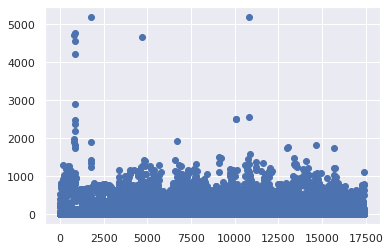

In [342]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [343]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Zapala cluster = 169 samples
# 0 = other places = 992 samples 

# Maybe we should bootstrap? 

0.0    992
1.0    169
Name: target, dtype: int64

In [344]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

3040    1.0
432     0.0
152     0.0
1768    0.0
2590    1.0
       ... 
2650    1.0
1142    1.0
901     1.0
2364    0.0
2901    0.0
Name: target, Length: 120, dtype: float64
  
966     1.0
1367    1.0
2585    1.0
898     1.0
2682    1.0
235     1.0
928     1.0
827     1.0
657     1.0
2531    1.0
2517    1.0
825     1.0
2592    1.0
2683    1.0
2584    1.0
901     1.0
941     1.0
2597    1.0
3044    1.0
830     1.0
944     1.0
2964    1.0
2590    1.0
2650    1.0
1333    1.0
819     1.0
2682    1.0
828     1.0
2416    1.0
2601    1.0
1366    1.0
2532    1.0
2499    1.0
2591    1.0
2590    1.0
660     1.0
2527    1.0
793     1.0
2598    1.0
2518    1.0
2652    1.0
2609    1.0
2592    1.0
1367    1.0
3040    1.0
442     1.0
2596    1.0
2600    1.0
1142    1.0
663     1.0
2965    1.0
2530    1.0
1142    1.0
2682    1.0
2592    1.0
2602    1.0
2264    1.0
811     1.0
950     1.0
1357    1.0
Name: target, dtype: float64


In [345]:
X_train

SAMPLE ID  SOURCE  ... target  id_number
3040           M10  GEOROC  ...    1.0       3040
432        LAYER E  GEOROC  ...    0.0        432
152           DR-1  GEOROC  ...    0.0        152
1768   HP 97-217 A  GEOROC  ...    0.0       1768
2590           M25  GEOROC  ...    1.0       2590
...            ...     ...  ...    ...        ...
2650           153  GEOROC  ...    1.0       2650
1142      281282-6  GEOROC  ...    1.0       1142
901   CRD 15 124/2  GEOROC  ...    1.0        901
2364          D-04  GEOROC  ...    0.0       2364
2901        NB8/99  GEOROC  ...    0.0       2901

[120 rows x 28 columns]

## SMOTE

In [346]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (1984, 15)
After OverSampling, the shape of train_y: (1984,) 

After OverSampling, counts of label '1': 992
After OverSampling, counts of label '0': 992


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [347]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR         TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000   8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000   4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000   8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000   9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000   8.820000  308.000000
...         ...       ...        ...  ...         ...        ...         ...
1979  75.039920  0.192445  13.487157  ...   91.470197  18.497422  140.774328
1980  73.595225  0.257716  14.180427  ...  126.540008  19.758802  190.951991
1981  67.816876  0.583652  15.818759  ...  723.088577   5.496817  140.352475
1982  70.915988  0.433862  14.902962  ...  262.175322  13.658187  239.819425
1983  74.988675  0.228037  13.456883  ...   71.068934  14.448100  151.882376

[1984 rows x 15 columns]

## Feature Scaling

In [348]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [349]:
# Standardization (Z-score Normalization) 

In [350]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()


# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
3040 -0.433056 -0.056120  0.690490  ...       3040  -34.1700   -69.8700
432   0.203591  0.616566 -0.684385  ...        432  -40.7268   -71.7858
152   1.252004 -1.367668 -0.718325  ...        152  -42.8364   -72.6413
1768 -0.906013  0.349746  1.169487  ...       1768  -16.6083   -70.8500
2590  2.163677 -1.728438 -1.728829  ...       2590  -40.2000   -69.8500

[5 rows x 18 columns]

In [351]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
2455 -0.269869  0.213491  0.539443  ...       2455  -25.4787   -68.1083
1404  1.423331 -1.603231 -1.395009  ...       1404  -31.9160   -69.5000
2645 -0.248594  0.528075 -0.020015  ...       2645  -31.4800   -70.4700
2394  1.667992 -1.327970 -1.438529  ...       2394  -33.3200   -70.6100
1438 -0.076083  0.150574 -0.086242  ...       1438  -22.2600   -68.1700

[5 rows x 18 columns]

## Scatter Matrix Plots

In [352]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [353]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [354]:
# Scatter Plot Matrix - on SMOTE X_train_res
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA

In [355]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [356]:
# PCA - training data

pca = PCA(n_components=1)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.37478096 -0.34305654 -0.30406021 -0.32178129 -0.21267382 -0.30582559
  -0.33547273 -0.1491876   0.23085435 -0.31950822 -0.04405     0.16712064
  -0.20455878  0.09638816 -0.18950826]]
 
original shape:    (120, 18)
transformed shape: (120, 1)


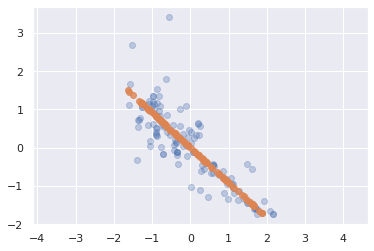

In [357]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

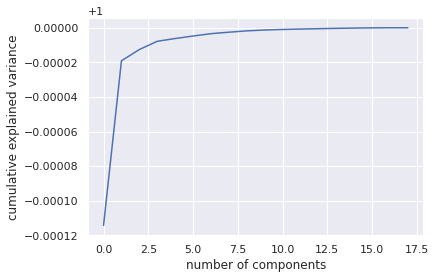

In [358]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [359]:
# Visualize all PCA components - SMOTE X_train_res

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [360]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.37868648  0.35348422  0.32022962  0.32749394  0.12295073  0.33269666
   0.35727875  0.14887277 -0.23354232  0.31668818 -0.01860135 -0.14504951
   0.23988282 -0.09301466  0.06177956]
 [-0.09532575  0.09801633  0.0816008   0.00788826 -0.06023247  0.10941305
   0.03704901 -0.38220698  0.38407533  0.20436026  0.35759529  0.52390256
   0.14886205  0.3336901   0.2939331 ]
 [ 0.066846   -0.09166969 -0.0215857  -0.07499903 -0.04507566 -0.16868262
  -0.09907226  0.29551726 -0.11047368 -0.12178002  0.57136554 -0.07907352
   0.37534872 -0.39491348  0.44364034]
 [ 0.03864348  0.12212073 -0.18145723  0.1888923   0.37773652 -0.1465671
  -0.07981829  0.32591641 -0.25196286 -0.01936255 -0.16652084  0.21532614
  -0.3231182   0.32569018  0.538324  ]]
 
original shape:    (1984, 15)
transformed shape: (1984, 4)


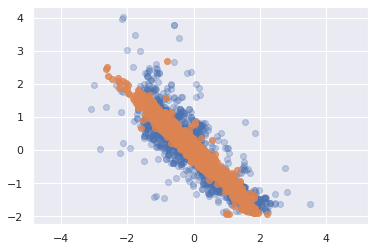

In [361]:
X_new = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

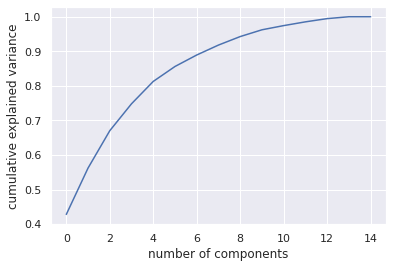

In [362]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

##RandomForestClassifier

In [363]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.6666666666666666]
 
[[34 26]
 [14 46]]


In [364]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: TH                   Importance: 0.16
Variable: BA                   Importance: 0.13
Variable: ZR                   Importance: 0.1
Variable: AL2O3                Importance: 0.08
Variable: CAO                  Importance: 0.08
Variable: RB                   Importance: 0.08
Variable: K2O                  Importance: 0.07
Variable: P2O5                 Importance: 0.07
Variable: MNO                  Importance: 0.05
Variable: MGO                  Importance: 0.04
Variable: NA2O                 Importance: 0.04
Variable: SR                   Importance: 0.04
Variable: TIO2                 Importance: 0.03
Variable: FEOT                 Importance: 0.02
Variable: SIO2                 Importance: 0.01


In [365]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['BA','K2O']], y_train)
pred = rf.predict(X_train[['BA','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.49166666666666664]
 
[[31 29]
 [32 28]]


In [366]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8]
 
[[46 14]
 [10 50]]


In [367]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.975]
 
[[57  3]
 [ 0 60]]


In [368]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [0.825]
 
[[54  6]
 [15 45]]


## RandomForestRegression

Mean Absolute Error: 0.37771666666666665
Mean Squared Error: 0.19460405
Root Mean Squared Error: 0.441139490410913
 
Accuracy: 0.2215838


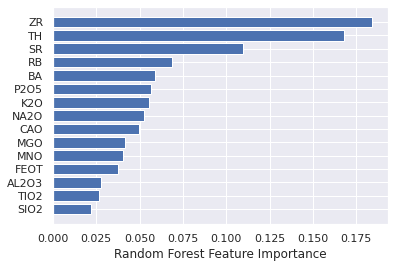

In [369]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 29.6693955158333
Mean Squared Error: 918.2424082953307
Root Mean Squared Error: 30.302514884004772
 
Accuracy: -0.5910588339288558


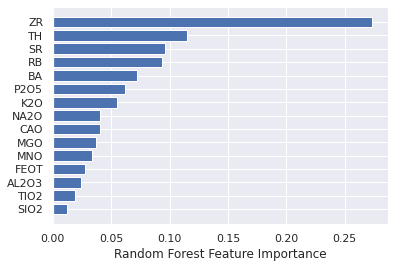

In [370]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 70.35551079059923
Mean Squared Error: 4951.852217339697
Root Mean Squared Error: 70.36939830167441
 
Accuracy: -0.4136355828125373


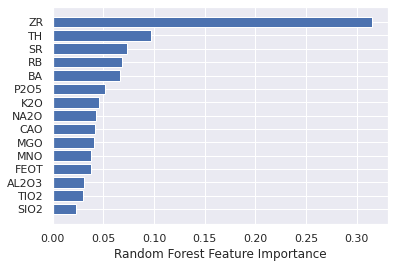

In [371]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

## LogisticRegression

Mean Absolute Error: 0.38333333333333336
Mean Squared Error: 0.38333333333333336
Root Mean Squared Error: 0.6191391873668903
 
 
Accuracy: 0.6166666666666667
Precision: 0.609375
Recall: 0.65
 
[[35 25]
 [21 39]]


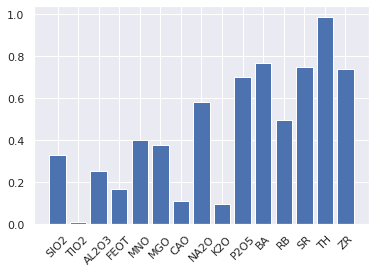

In [372]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

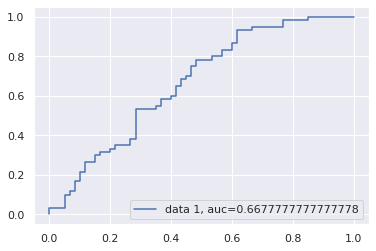

In [373]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.83. ( good )

Mean Absolute Error: 0.275
Mean Squared Error: 0.275
Root Mean Squared Error: 0.5244044240850758
 
 
Accuracy: 0.725
Precision: 0.7368421052631579
Recall: 0.7
 
[[45 15]
 [18 42]]


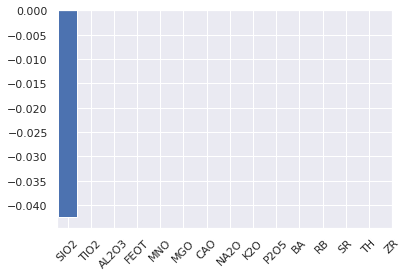

In [374]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

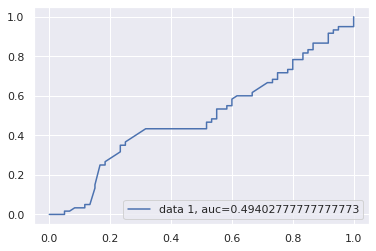

In [375]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.66. (BAD )

Mean Absolute Error: 0.3
Mean Squared Error: 0.3
Root Mean Squared Error: 0.5477225575051661
 
 
Accuracy: 0.7
Precision: 0.6578947368421053
Recall: 0.8333333333333334
 
[[34 26]
 [10 50]]


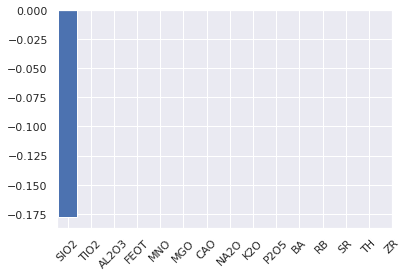

In [376]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

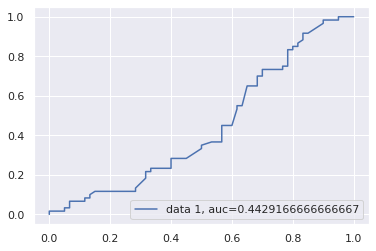

In [377]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.58. ( bad )

Mean Absolute Error: 0.35833333333333334
Mean Squared Error: 0.35833333333333334
Root Mean Squared Error: 0.5986094998689324
 
 
Accuracy: 0.6416666666666667
Precision: 0.6440677966101694
Recall: 0.6333333333333333
 
[[39 21]
 [22 38]]
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64        60
         1.0       0.64      0.63      0.64        60

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120



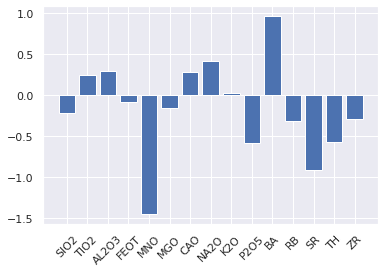

In [378]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

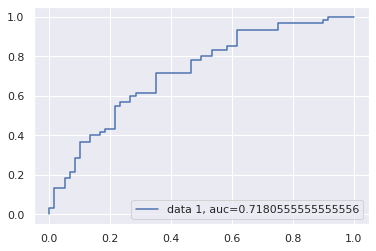

In [379]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.81. ( good )

In [384]:
###

# Testing - Latitude



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

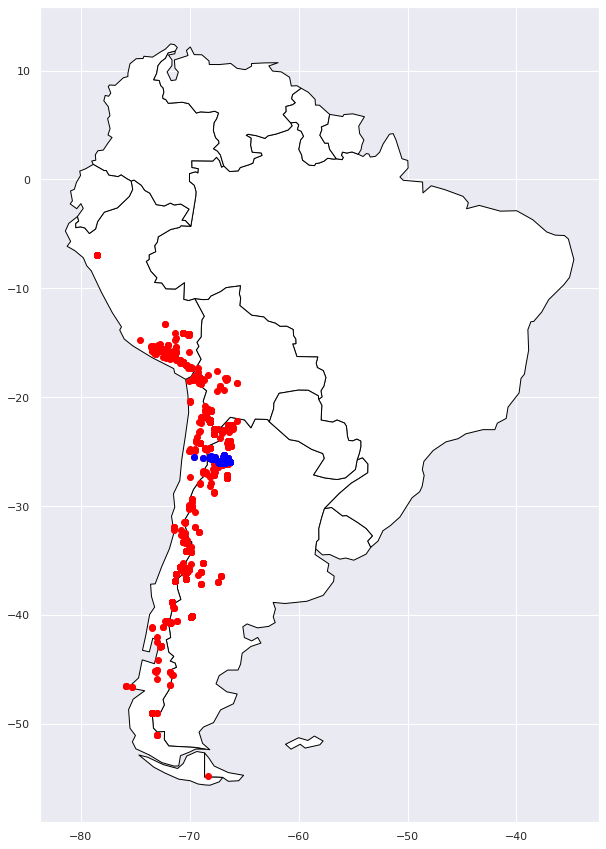

In [385]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat
#Zapala_Cluster = data_all.loc[(data_all['LATITUDE'] <= -31) & (data_all['LATITUDE'] >= -38) ] 
#Zapala_Cluster = Zapala_Cluster.loc[(Zapala_Cluster['LONGITUDE'] <= -69.5) & (Zapala_Cluster['LONGITUDE'] >= -71.2)]


Lat_Cluster = data_all.loc[(data_all['LATITUDE'] <= -25) & (data_all['LATITUDE'] >= -26) ] 
Lat_Cluster = Lat_Cluster.loc[(Lat_Cluster['LONGITUDE'] <= -64) & (Lat_Cluster['LONGITUDE'] >= -70.5)]



# Mark samples in cluster with 'target'
Lat_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Lat_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Lat_Cluster, geometry=geopandas.points_from_xy(Lat_Cluster['LONGITUDE'],Lat_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [386]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

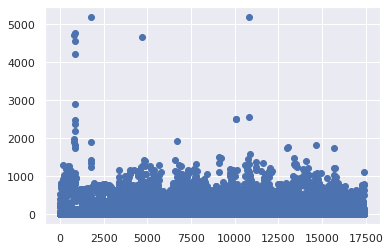

In [387]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [388]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Zapala cluster = 169 samples
# 0 = other places = 992 samples 

# Maybe we should bootstrap? 

0.0    950
1.0    211
Name: target, dtype: int64

In [389]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

205     1.0
3007    1.0
3022    1.0
185     1.0
1303    0.0
       ... 
316     0.0
1595    0.0
1838    0.0
2449    1.0
1708    1.0
Name: target, Length: 120, dtype: float64
  
2427    1.0
3008    1.0
1706    1.0
2360    1.0
2941    1.0
2981    1.0
2365    1.0
3022    1.0
2445    1.0
1707    1.0
231     1.0
193     1.0
2953    1.0
185     1.0
2456    1.0
202     1.0
2451    1.0
2367    1.0
2366    1.0
204     1.0
2433    1.0
193     1.0
2359    1.0
2436    1.0
1708    1.0
184     1.0
1516    1.0
2459    1.0
2450    1.0
205     1.0
2732    1.0
205     1.0
2461    1.0
2740    1.0
2774    1.0
2435    1.0
1501    1.0
2466    1.0
2997    1.0
232     1.0
2753    1.0
2992    1.0
2740    1.0
186     1.0
228     1.0
2968    1.0
214     1.0
189     1.0
2976    1.0
2449    1.0
2448    1.0
1529    1.0
2939    1.0
214     1.0
2944    1.0
2995    1.0
219     1.0
3007    1.0
2983    1.0
1708    1.0
Name: target, dtype: float64


In [390]:
X_train

SAMPLE ID  SOURCE  ... target  id_number
205     CG475G  GEOROC  ...    1.0        205
3007     CG219  GEOROC  ...    1.0       3007
3022    CG 323  GEOROC  ...    1.0       3022
185    SAF332A  GEOROC  ...    1.0        185
1303   PAR 036  GEOROC  ...    0.0       1303
...        ...     ...  ...    ...        ...
316      IV-D1  GEOROC  ...    0.0        316
1595     51-48  GEOROC  ...    0.0       1595
1838     PA-24  GEOROC  ...    0.0       1838
2449     AR278  GEOROC  ...    1.0       2449
1708     CG216  GEOROC  ...    1.0       1708

[120 rows x 28 columns]

## SMOTE

In [391]:
# Initiate SMOTE 
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (1900, 15)
After OverSampling, the shape of train_y: (1900,) 

After OverSampling, counts of label '1': 950
After OverSampling, counts of label '0': 950


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [392]:
# Turn X_train_res into dataframe
X_train_res = pd.DataFrame(X_train_res)
X_train_res 

# reanming the DataFrame columns
X_train_res.columns = cluster_variables
X_train_res

SIO2      TIO2      AL2O3  ...          SR         TH          ZR
0     69.144000  0.565000  14.590000  ...  190.000000   8.600000  282.000000
1     63.541000  0.796000  16.427000  ...  294.000000   4.300000  195.000000
2     70.931000  0.340000  13.794000  ...  138.000000   8.300000  307.000000
3     70.047000  0.688000  14.039000  ...  161.000000   9.180000  342.000000
4     69.367000  0.531000  14.150000  ...  197.000000   8.820000  308.000000
...         ...       ...        ...  ...         ...        ...         ...
1895  69.433379  0.600228  15.305687  ...  293.234672  29.139740  188.365213
1896  66.147332  0.902181  15.919494  ...  304.448782  26.702105  220.296215
1897  69.591077  0.635993  15.173089  ...  269.309527  33.999336  194.730651
1898  70.308793  0.615311  14.901017  ...  259.402202  31.589601  186.055844
1899  69.755608  0.551288  14.898432  ...  278.921678  28.322669  177.269056

[1900 rows x 15 columns]

## Feature Scaling

In [393]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [394]:
# Standardization (Z-score Normalization) 

In [395]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()


# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
205   0.453401 -0.438930 -0.026497  ...        205  -25.9800   -67.2100
3007 -0.133059  0.099988  0.379964  ...       3007  -25.9300   -66.6898
3022  0.315483  0.430457 -0.015824  ...       3022  -25.8500   -66.8100
185  -0.508293  0.344026  0.055329  ...        185  -25.9751   -67.2095
1303  1.615448 -1.333738 -1.520708  ...       1303  -18.1867   -69.1767

[5 rows x 18 columns]

In [396]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
198   0.286417 -0.005888  0.025757  ...        198  -25.9800   -67.2100
2938  0.129055  0.310524 -0.166504  ...       2938  -25.6745   -66.8568
2953  0.510258  0.059129 -0.623447  ...       2953  -25.6583   -66.8740
1046  0.125128  0.635604 -0.480329  ...       1046  -36.8600   -71.3800
205   0.354299 -0.482672  0.120594  ...        205  -25.9800   -67.2100

[5 rows x 18 columns]

## Scatter Matrix Plots

In [397]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [398]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [399]:
# Scatter Plot Matrix - on SMOTE X_train_res
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_res[cluster_variables],
    dimensions=features,
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA

In [400]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [401]:
# PCA - training data

pca = PCA(n_components=1)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.40133556 -0.36599313 -0.2655117  -0.3765719  -0.1449232  -0.3493367
  -0.38751929 -0.07986009  0.21591165 -0.2855322   0.03199696  0.18655477
  -0.15976226  0.0595129  -0.00703598]]
 
original shape:    (120, 18)
transformed shape: (120, 1)


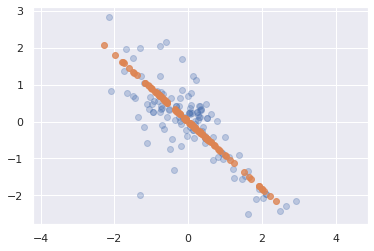

In [402]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

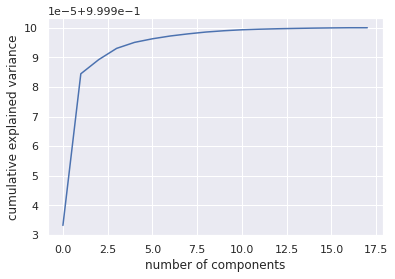

In [403]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [404]:
# Visualize all PCA components - SMOTE X_train_res

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train_res[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train_res
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [405]:
# PCA - SMOTE training data

pca = PCA(n_components=4)
pca.fit(X_train_res[cluster_variables])
X_pca_res = pca.transform(X_train_res[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train_res.shape)
print("transformed shape:", X_pca_res.shape)

[[-0.39598518  0.35061745  0.31974856  0.34813726  0.09955031  0.34405361
   0.36975635  0.12016158 -0.23750473  0.27769115  0.03041185 -0.14250706
   0.22355223 -0.09076778  0.0664405 ]
 [ 0.09548552 -0.18040992 -0.08262691 -0.0077563   0.14027675 -0.15156691
  -0.06312184  0.43130457 -0.35352329 -0.31577526  0.19185729 -0.429262
   0.11473866 -0.50363561  0.07878908]
 [ 0.01437605 -0.00653422  0.03560492 -0.07110676 -0.06941463 -0.06949194
  -0.06671929 -0.02297146  0.13499066  0.04196798  0.60961358  0.30731884
   0.39677289  0.02073682  0.57869159]
 [ 0.01536021  0.21611549 -0.20268006  0.25302133  0.4677861  -0.20273568
  -0.15798     0.29653014 -0.13916189  0.11572939 -0.16366029  0.20845002
  -0.3995792   0.18034107  0.42422152]]
 
original shape:    (1900, 15)
transformed shape: (1900, 4)


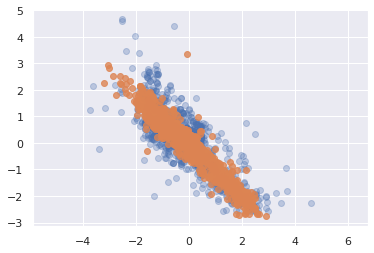

In [406]:
X_new = pca.inverse_transform(X_pca_res)
plt.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

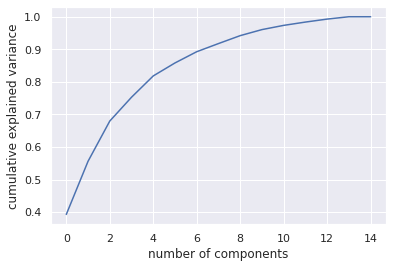

In [407]:
pca = PCA().fit(X_train_res)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

##RandomForestClassifier

In [408]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8583333333333333]
 
[[53  7]
 [10 50]]


In [409]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: TH                   Importance: 0.2
Variable: NA2O                 Importance: 0.13
Variable: RB                   Importance: 0.13
Variable: MNO                  Importance: 0.09
Variable: K2O                  Importance: 0.09
Variable: SR                   Importance: 0.08
Variable: P2O5                 Importance: 0.06
Variable: TIO2                 Importance: 0.04
Variable: SIO2                 Importance: 0.03
Variable: FEOT                 Importance: 0.03
Variable: MGO                  Importance: 0.03
Variable: BA                   Importance: 0.03
Variable: CAO                  Importance: 0.02
Variable: ZR                   Importance: 0.02
Variable: AL2O3                Importance: 0.01


In [410]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['BA','K2O']], y_train)
pred = rf.predict(X_train[['BA','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.55]
 
[[27 33]
 [21 39]]


In [411]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9416666666666667]
 
[[55  5]
 [ 2 58]]


In [412]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8833333333333333]
 
[[46 14]
 [ 0 60]]


In [413]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [1.0]
 
[[60  0]
 [ 0 60]]


## RandomForestRegression

Mean Absolute Error: 0.1871833333333333
Mean Squared Error: 0.07837705
Root Mean Squared Error: 0.27995901485753233
 
Accuracy: 0.6864918


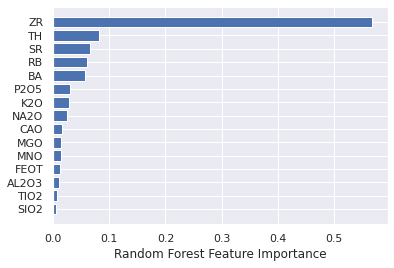

In [414]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 27.350012519454854
Mean Squared Error: 778.6655702091773
Root Mean Squared Error: 27.904579735397867
 
Accuracy: -0.7432907128129307


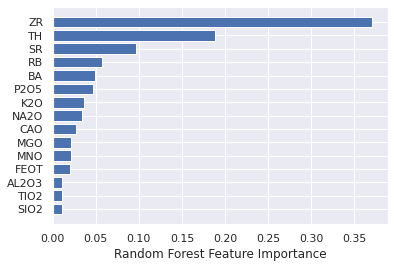

In [415]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 69.18455428699056
Mean Squared Error: 4788.097800681831
Root Mean Squared Error: 69.19608226396804
 
Accuracy: -0.42984090970213895


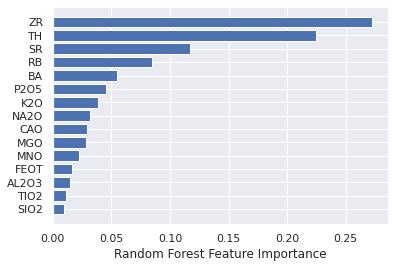

In [416]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

## LogisticRegression

Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287
 
 
Accuracy: 0.9166666666666666
Precision: 0.9166666666666666
Recall: 0.9166666666666666
 
[[55  5]
 [ 5 55]]


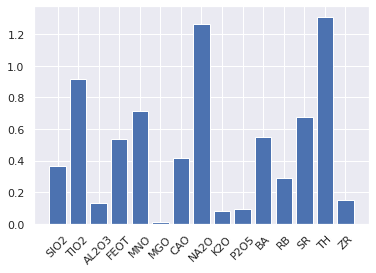

In [417]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

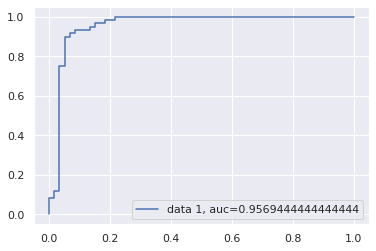

In [418]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.83. ( good )

Mean Absolute Error: 0.25833333333333336
Mean Squared Error: 0.25833333333333336
Root Mean Squared Error: 0.5082650227325636
 
 
Accuracy: 0.7416666666666667
Precision: 0.6593406593406593
Recall: 1.0
 
[[29 31]
 [ 0 60]]


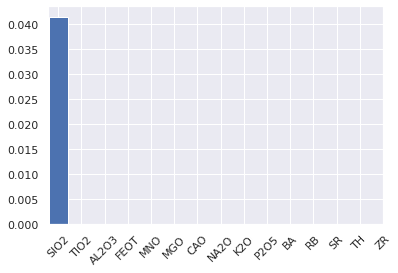

In [419]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

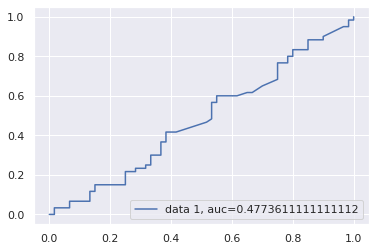

In [420]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.66. (BAD )

Mean Absolute Error: 0.11666666666666667
Mean Squared Error: 0.11666666666666667
Root Mean Squared Error: 0.3415650255319866
 
 
Accuracy: 0.8833333333333333
Precision: 0.8108108108108109
Recall: 1.0
 
[[46 14]
 [ 0 60]]


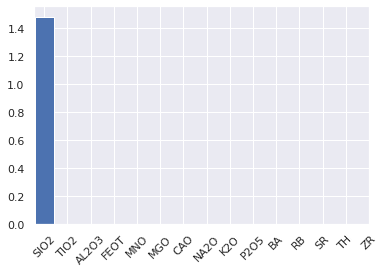

In [421]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

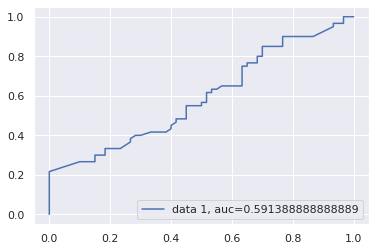

In [422]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.58. ( bad )

Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287
 
 
Accuracy: 0.9166666666666666
Precision: 0.890625
Recall: 0.95
 
[[53  7]
 [ 3 57]]
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        60
         1.0       0.89      0.95      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



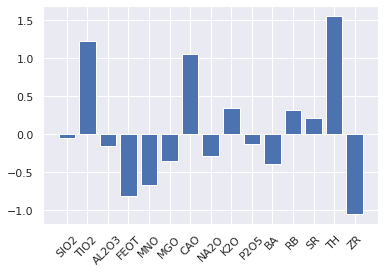

In [423]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res[cluster_variables],y_train_res)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

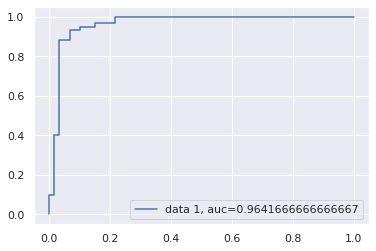

In [426]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.96. ( good )